In [2]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import tqdm
import evaluate
import matplotlib.pyplot as plt

In [3]:
import pandas as pd 

In [4]:
valid_origin = pd.read_csv('../dev/dev_baseline.csv')
valid_origin

,Unnamed: 0,ID,text,target,url,date,pred_target
0,2602,ynat-v1_train_02602,나태주 너를 먼저 생각한다면 미투 나올 일 없겠죠,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.18. 오전 10:10,2
1,964,ynat-v1_train_00964,손학규 曺 임명은 정권위기로 연결…지명철회 촉구,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.09.09. 오전 10:22,6
2,2893,ynat-v1_train_02893,北 청년동맹 70돌 행사 연일보도…대북제재 겨냥 체제결속,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.01.14. 오전 10:06,6
3,3318,ynat-v1_train_03318,가장 순수한 춤…서울국제즉흥춤축제 24일 개막,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.16. 오전 10:10,3
4,3788,ynat-v1_train_03788,카슈끄지 살해 주범 빈살마 놩세자 보좌과 녀전히 실세로 활동,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.12. 오후 3:50,4
...,...,...,...,...,...,...,...
2095,5848,ynat-v1_train_05848,KT파워텔 폴더형 LTE 무전기 라져 F2 출시,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.01.31. 오전 11:49,0
2096,4259,ynat-v1_train_04259,게시판 창의재단고용노동부 강남지청 일·가정 양립 MOU,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.07.06. 오후 5:15,2
2097,5503,ynat-v1_train_05503,카드뉴스 우주의 유리천장을 깬 흑인 여성들,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.10. 오전 11:00,0
2098,1745,ynat-v1_train_01745,작년 방한 관광객 12년만에 뒷걸음…메르스 영향,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.01.19. 오전 7:24,3


In [5]:
valid_origin[valid_origin.pred_target != valid_origin.target].to_csv('../analysis/wrong.csv',index =False)

In [6]:
f1 = evaluate.load('f1')
f1.compute(predictions= valid_origin.pred_target, references=valid_origin.target, average='macro')


{'f1': 0.8543281536060173}

#### 못맞추는 라벨의 개수

target
0     51
1     88
2    116
3     51
4     37
5     23
6     56
Name: count, dtype: int64

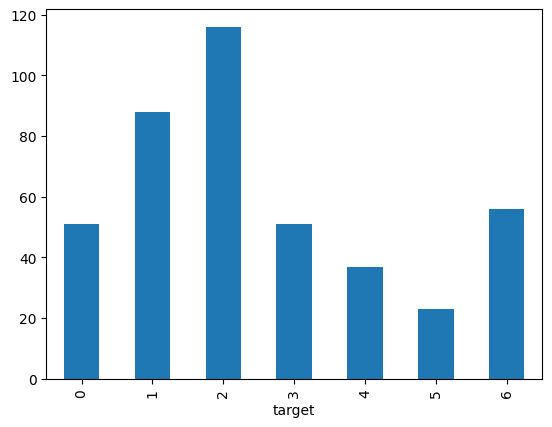

In [97]:
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar')
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

### pred_label 전체 분포

target
0    34
1    66
2    91
3    39
4    27
5    15
6    31
Name: count, dtype: int64

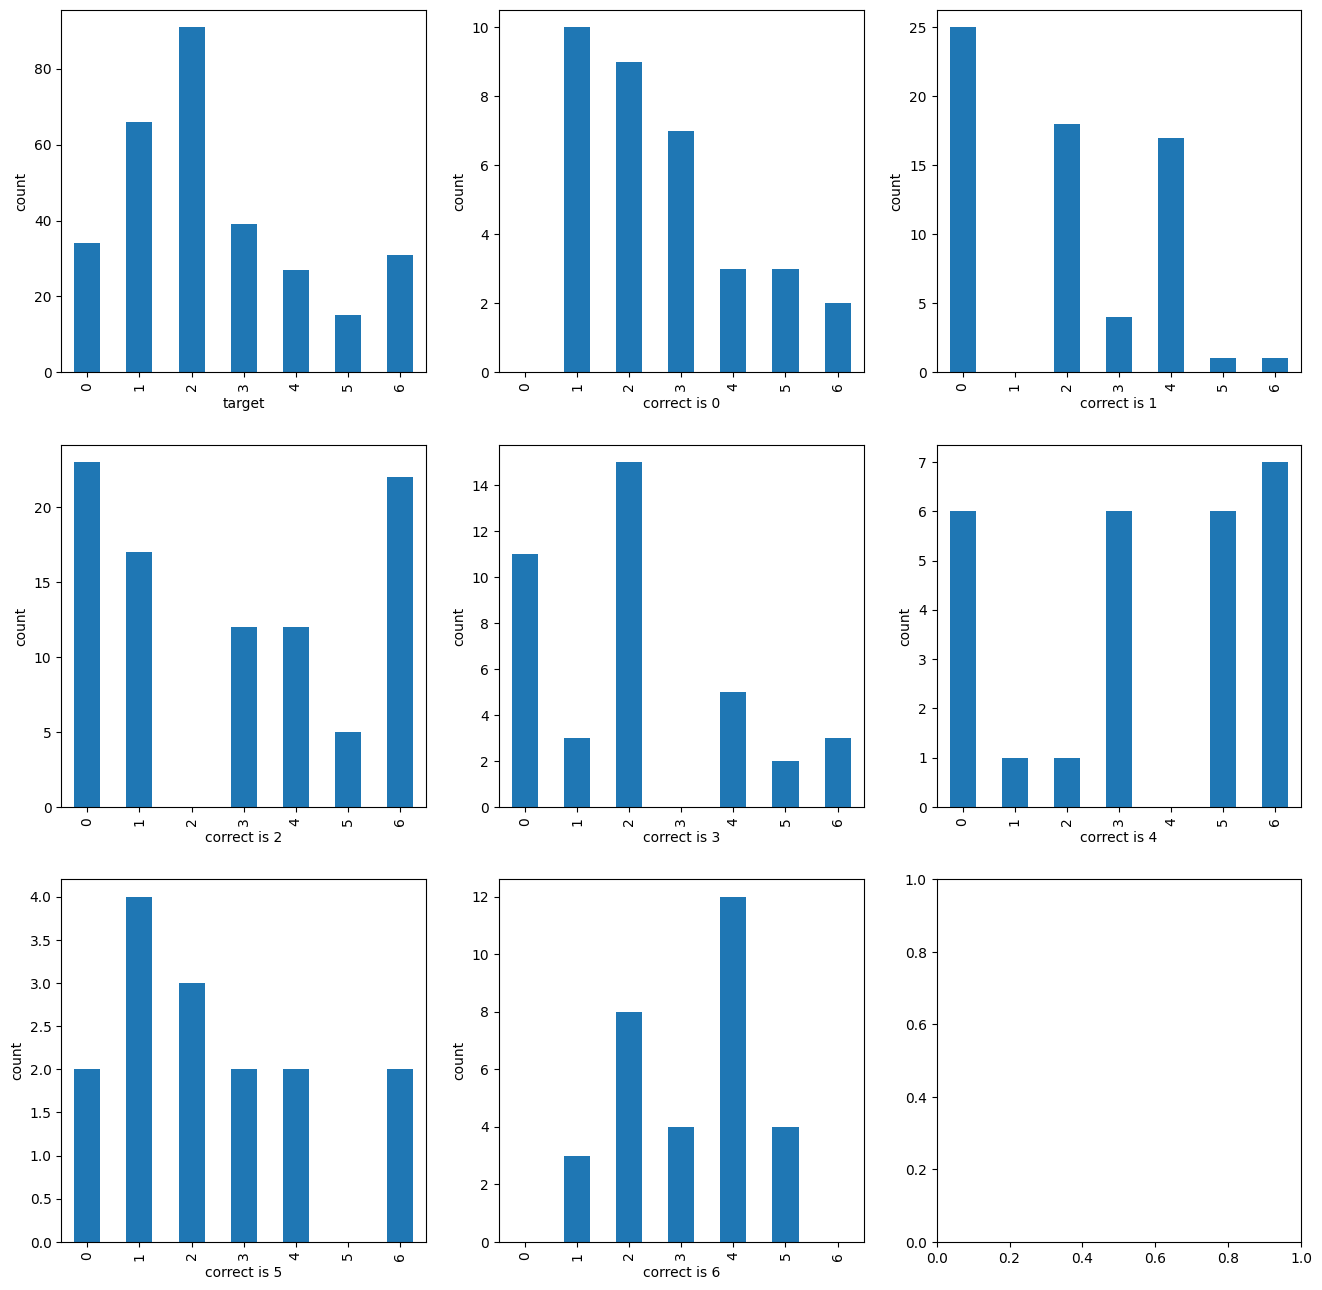

In [39]:
valid = pd.read_csv('../dev_baseline.csv')

fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+1],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7))

target
0     49
1     69
2    107
3     34
4     37
5     18
6     44
Name: count, dtype: int64

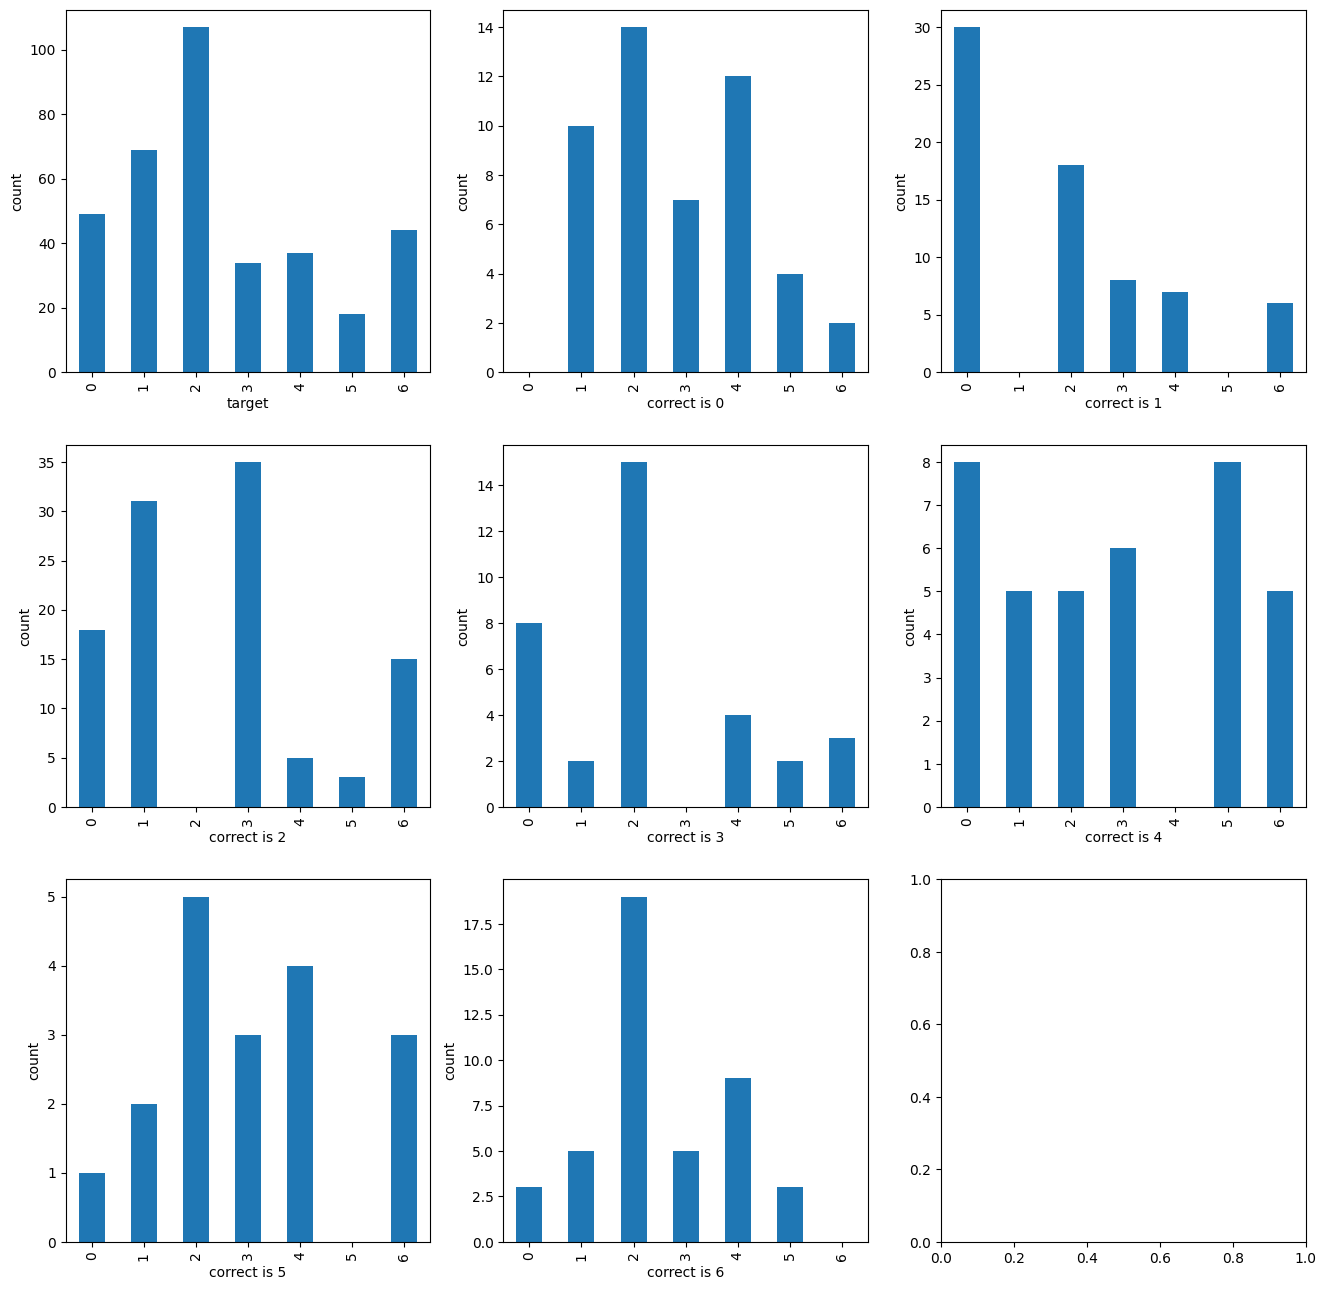

In [36]:
valid = pd.read_csv('../dev_add2_200.csv')


fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+1],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7))
    


target
0     44
1     63
2    107
3     47
4     33
5     19
6     40
Name: count, dtype: int64

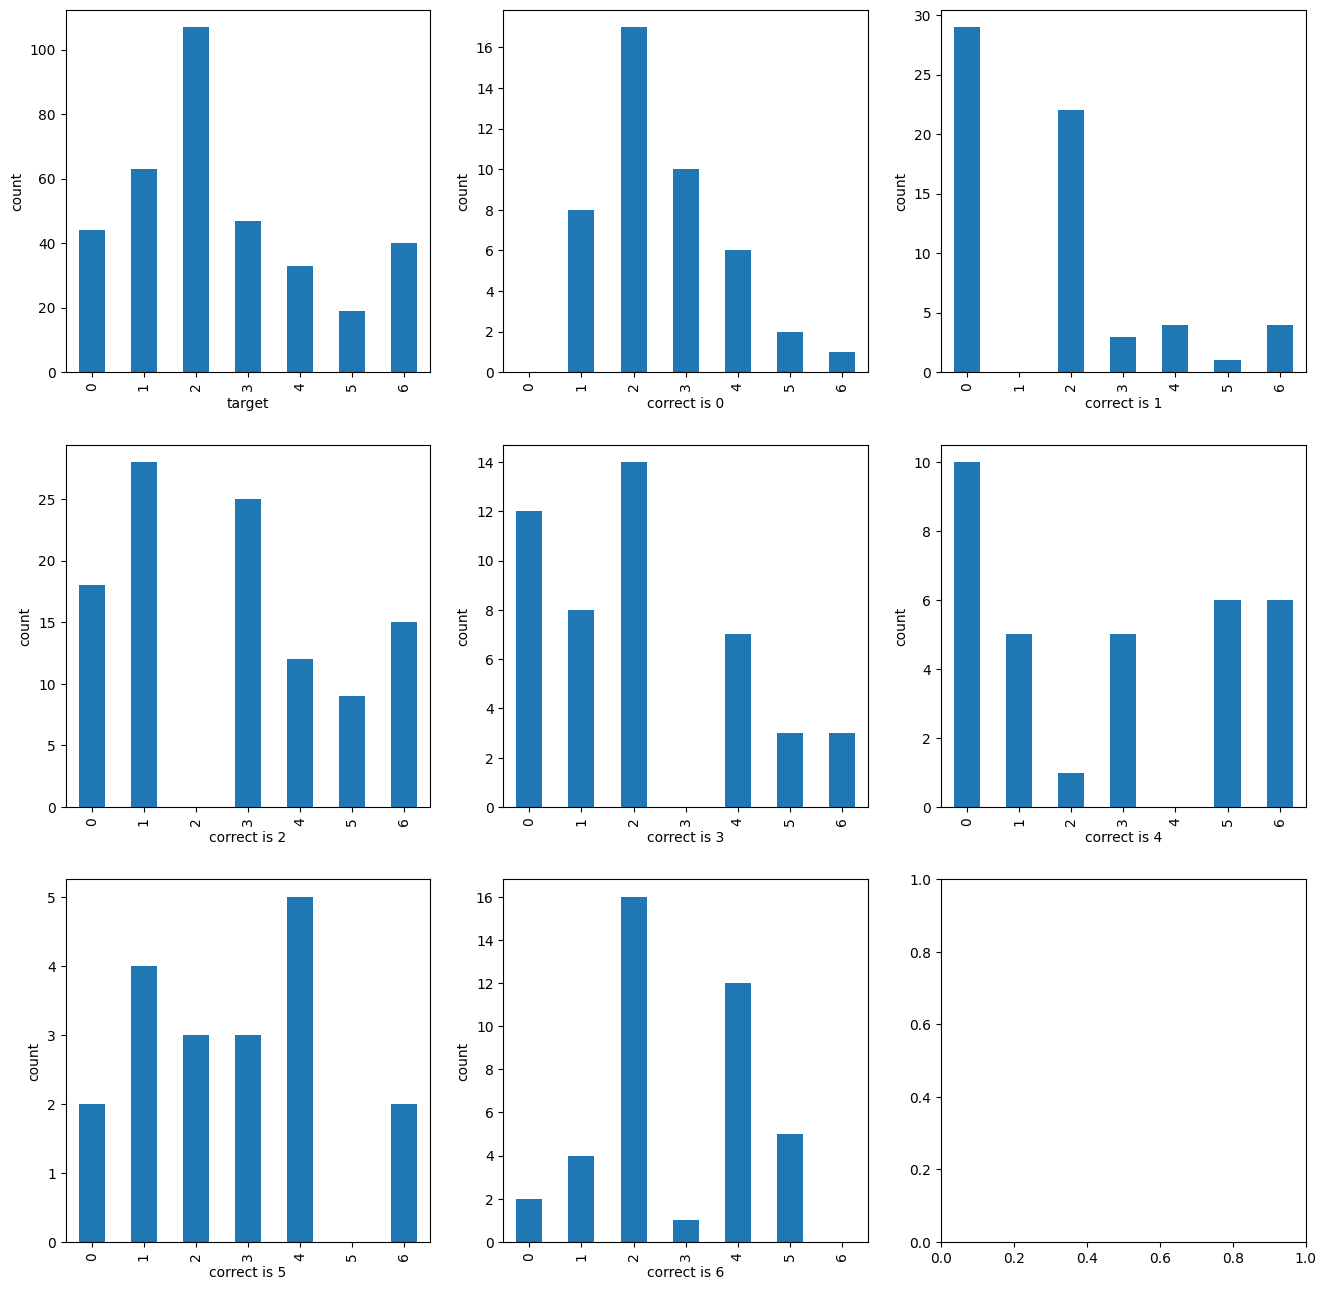

In [37]:
valid = pd.read_csv('../dev_add2_400.csv')

fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+1],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7))
    


(target
 0    34
 1    77
 2    77
 3    44
 4    32
 5    14
 6    39
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64)

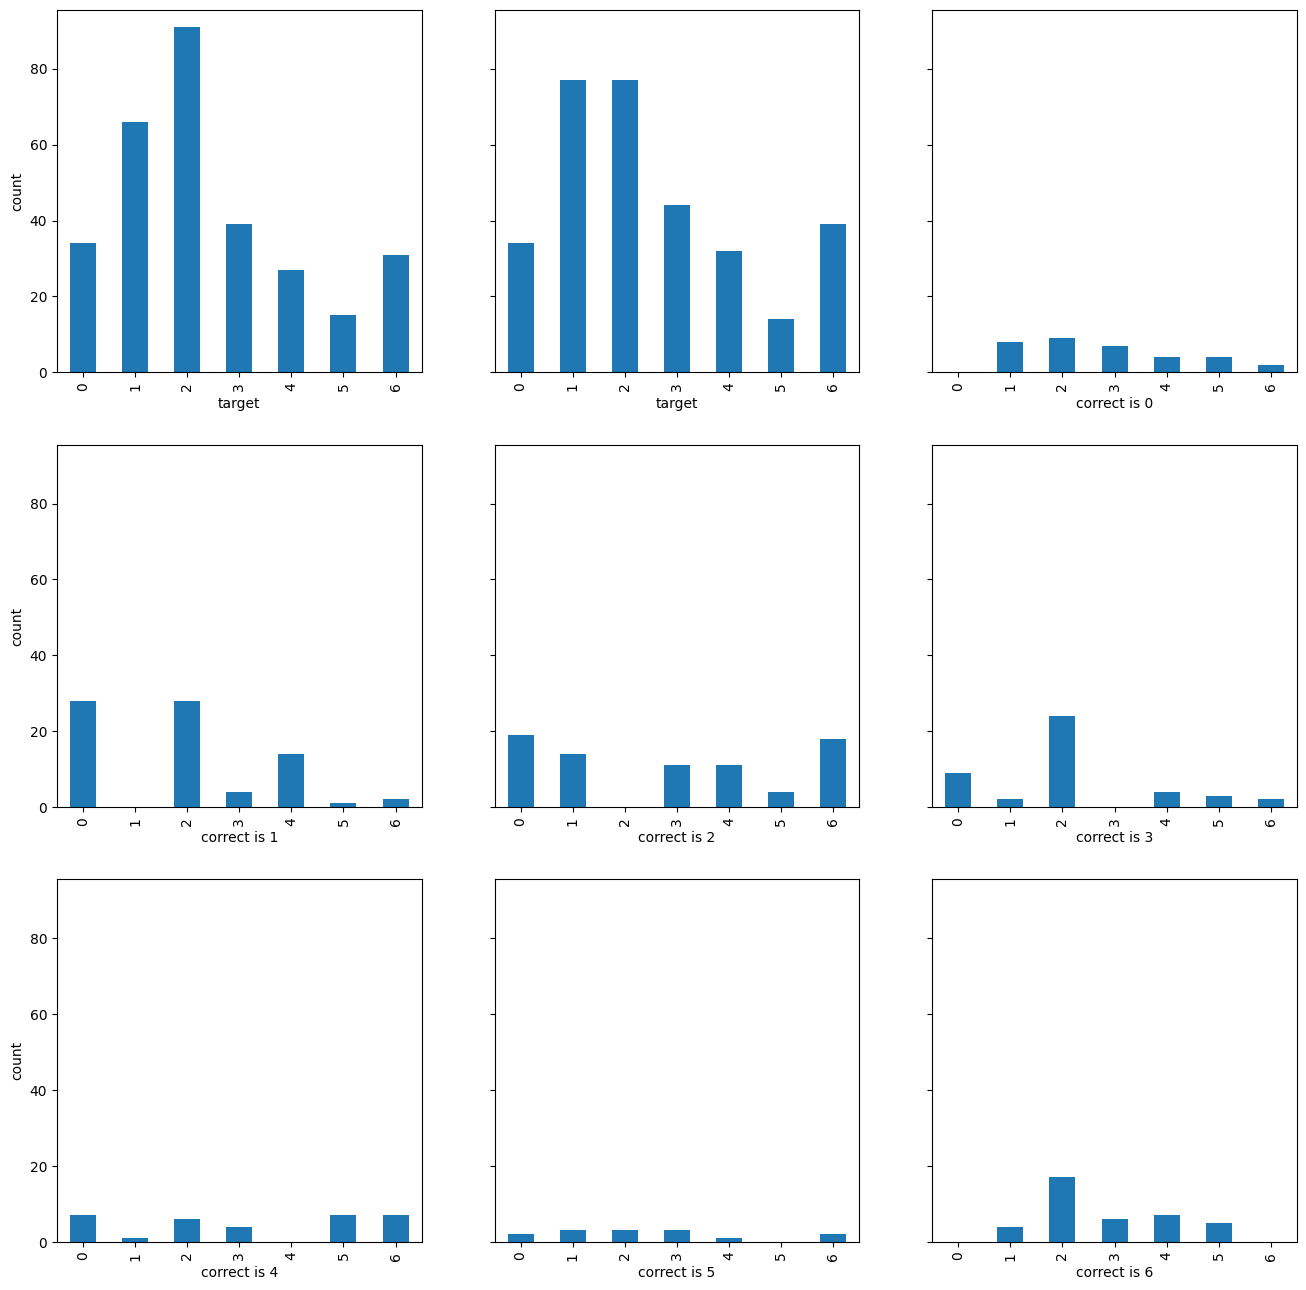

In [84]:
valid = pd.read_csv('../dev/dev_add2_600.csv')

fig, axes =plt.subplots(3,3,figsize=(16,16),sharey='all')
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))


(target
 0    38
 1    67
 2    81
 3    45
 4    29
 5    14
 6    32
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64)

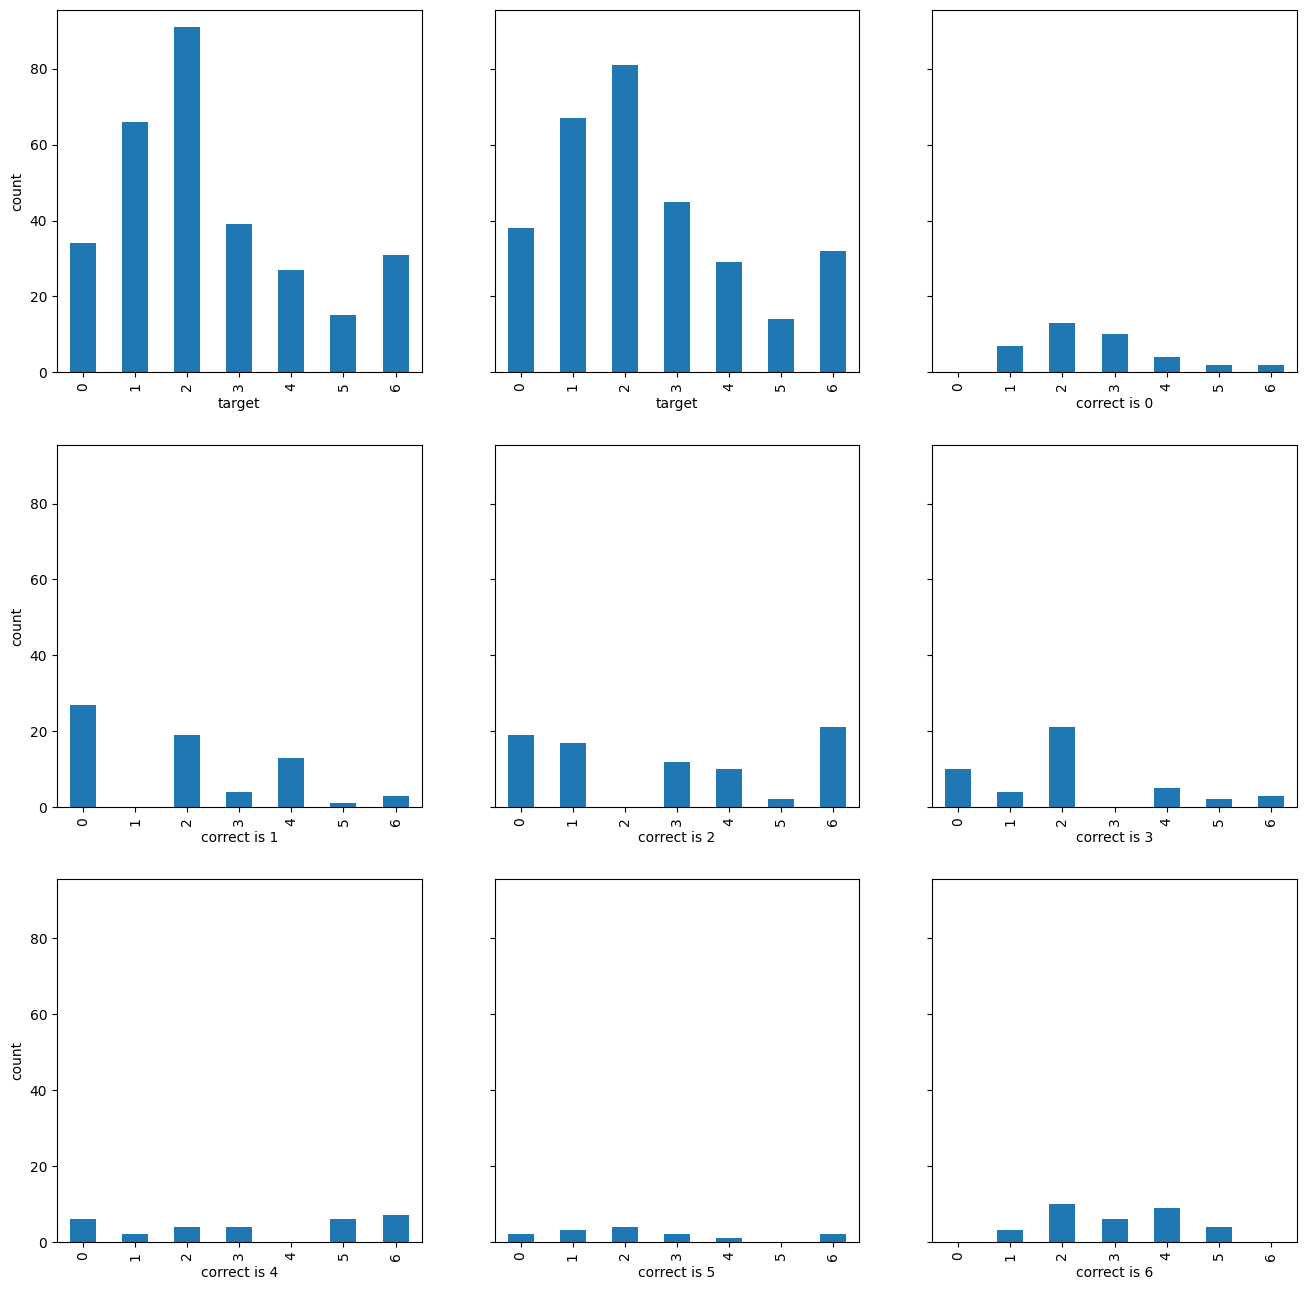

In [86]:
valid = pd.read_csv('../dev/dev_add2_1000.csv')

fig, axes =plt.subplots(3,3,figsize=(16,16),sharey='all')
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

target
0    48
1    73
2    92
3    38
4    38
5    14
6    38
Name: count, dtype: int64

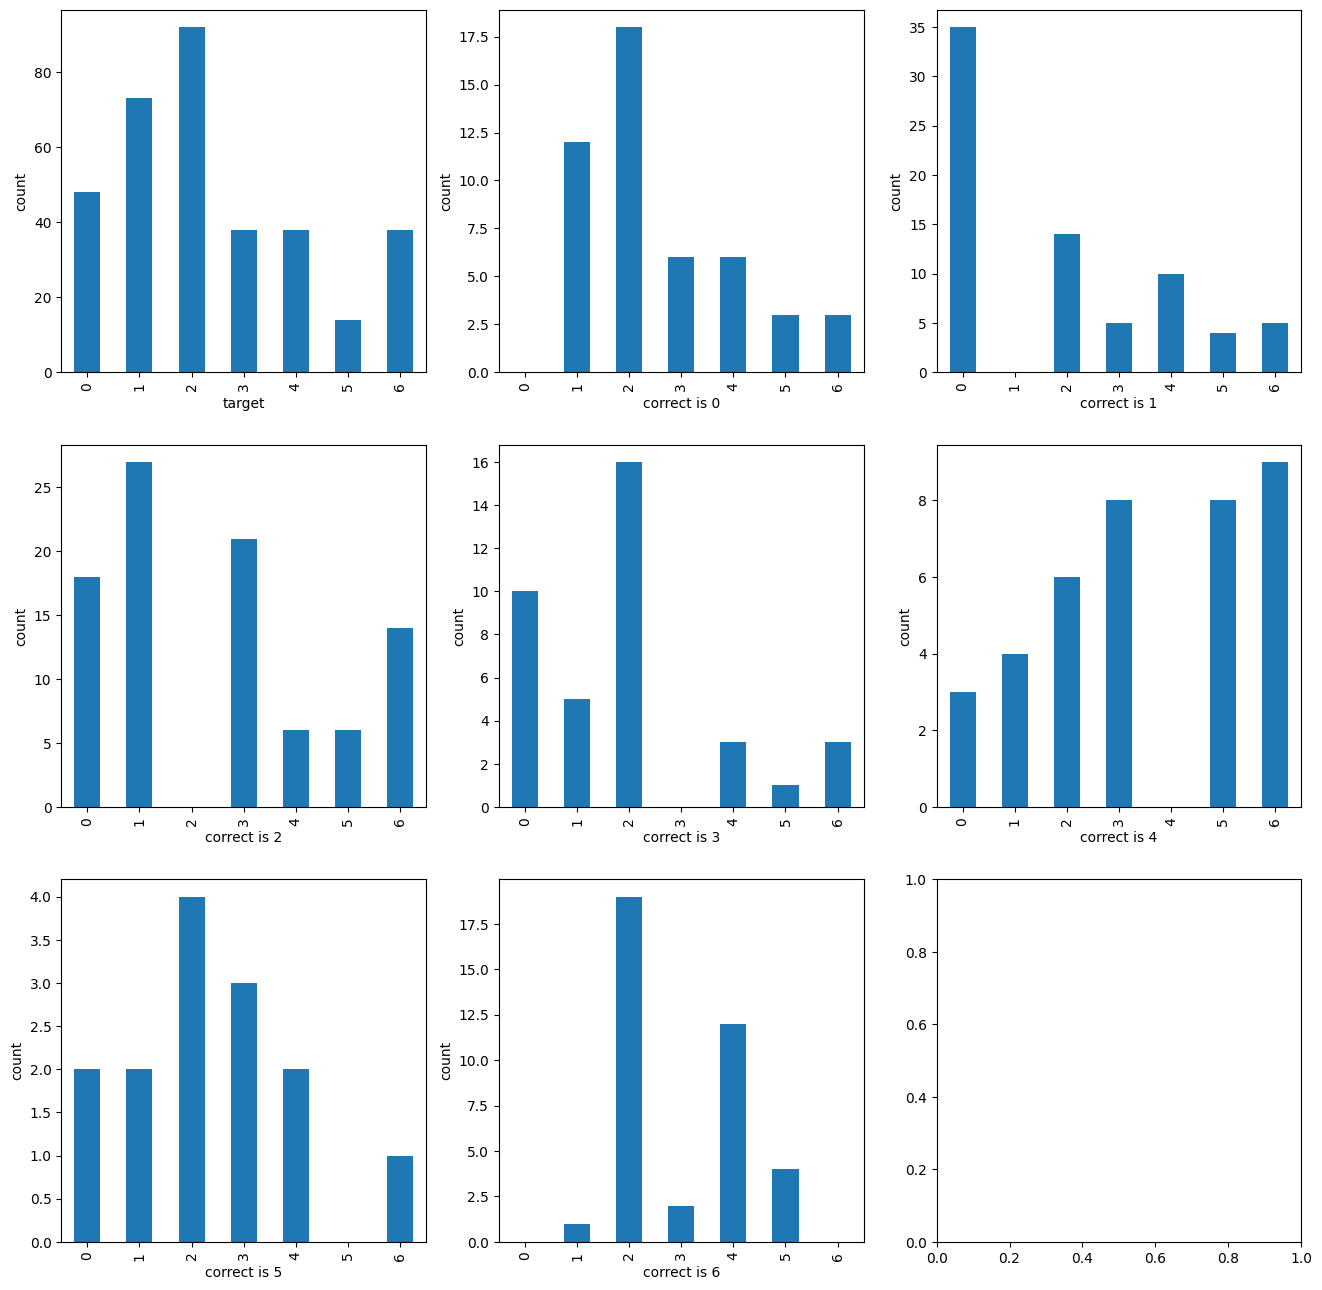

In [80]:
valid = pd.read_csv('../dev/dev_remove_punc2_600.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+1],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7))

In [ ]:
valid = pd.read_csv('../dev_remove_punc2_600.csv')
valid2 = pd.read_csv('../dev_add2_600.csv')
valid.target2

In [46]:
valid[(valid.target != valid.pred_target) & (valid.target==2) ].pred_target.value_counts().reindex(range(7)).values

array([18., 27., nan, 21.,  6.,  6., 14.])

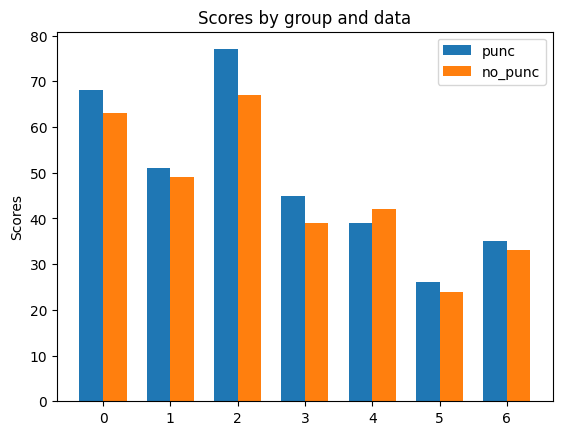

In [53]:
import matplotlib.pyplot as plt
import numpy as np

valid = pd.read_csv('../dev_remove_punc2_600.csv')
valid2 = pd.read_csv('../dev_add2_600.csv')

# X축의 위치 설정
x = np.arange(7)

# 막대 너비
width = 0.35

# 그래프 생성
plt.bar(x - width/2, valid[(valid.target != valid.pred_target)].pred_target.value_counts().reindex(range(7)).values, width, label='punc')
plt.bar(x + width/2, valid2[(valid2.target != valid2.pred_target)].pred_target.value_counts().reindex(range(7)).values, width, label='no_punc')
# plt.bar(x + width/2, data2, width, label='Data 2')

# 라벨, 제목, 범례 설정
plt.ylabel('Scores')
plt.title('Scores by group and data')
plt.legend()

# 그래프 표시
plt.show()


In [54]:
f1 = evaluate.load('f1')
f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')


{'f1': 0.8524341406537985}

In [55]:
f1 = evaluate.load('f1')
f1.compute(predictions= valid2.pred_target, references=valid2.target, average='macro')


{'f1': 0.8629489503170424}

(target
 0     38
 1     57
 2    119
 3     46
 4     34
 5     16
 6     35
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64)

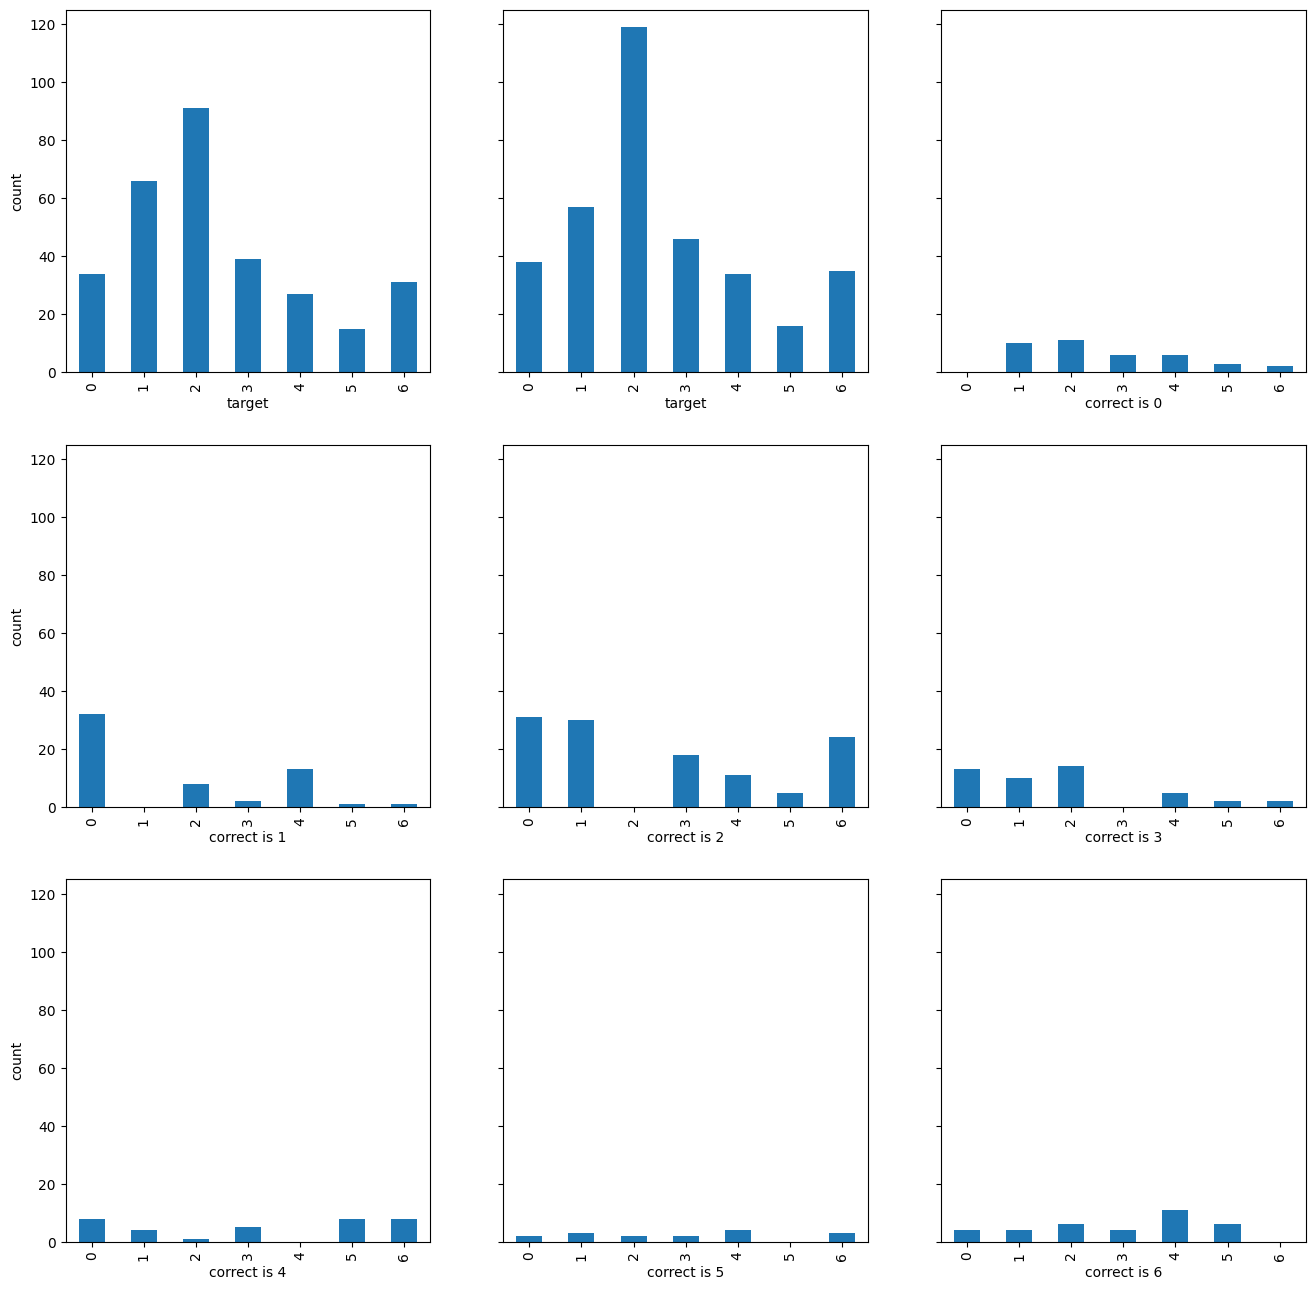

In [79]:
valid = pd.read_csv('../dev/dev_arg2000.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16),sharey='all')
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

(target
 0     36
 1     54
 2    140
 3     51
 4     31
 5     13
 6     39
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64)

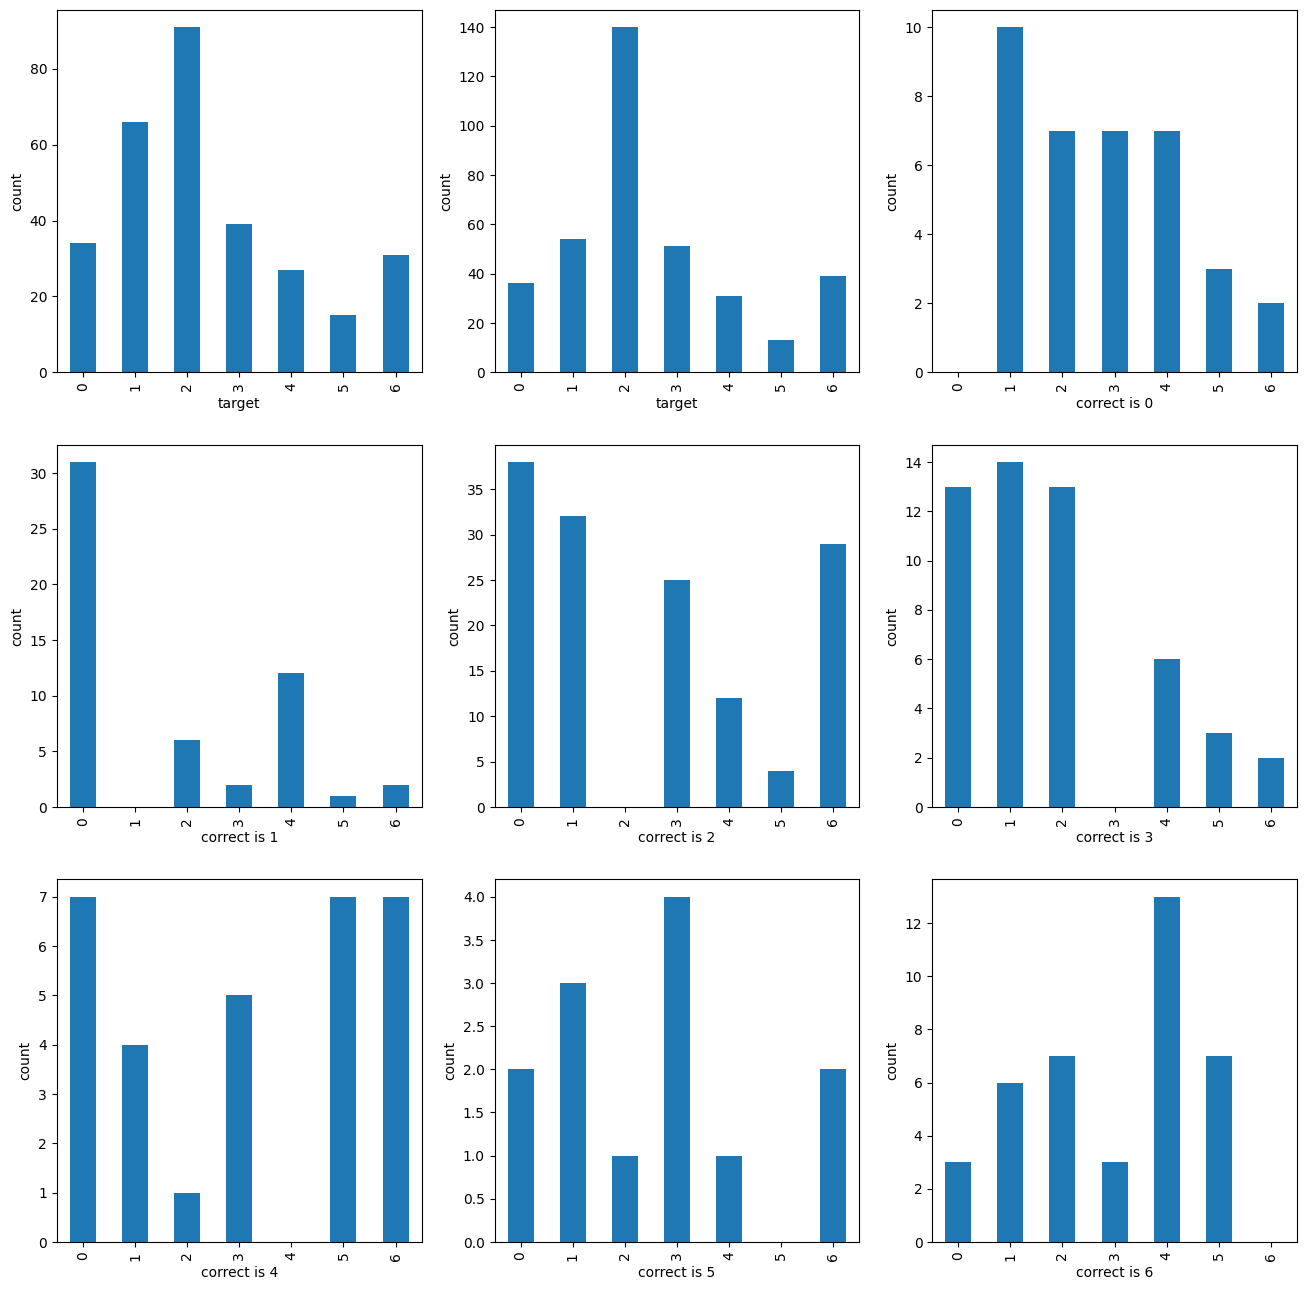

In [74]:
valid = pd.read_csv('../dev/dev_remove2000.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

In [75]:
valid[(valid.target == valid.pred_target) &(valid_origin.target != valid_origin.pred_target)].target.value_counts().reindex(range(7)), valid[(valid.target != valid.pred_target) &(valid_origin.target == valid_origin.pred_target)].target.value_counts().reindex(range(7))


(target
 0    10
 1    23
 2     8
 3     9
 4     3
 5     2
 6     5
 Name: count, dtype: int64,
 target
 0    12.0
 1    11.0
 2    57.0
 3    21.0
 4     7.0
 5     NaN
 6    13.0
 Name: count, dtype: float64)

In [76]:
valid[(valid.target != valid.pred_target) &(valid_origin.target != valid_origin.pred_target)]

,Unnamed: 0,ID,text,target,url,date,pred_target
8,1209,ynat-v1_train_01209,대통령 퇴진 4개월째 시위 수단서 저항의 상징 여성 눈길,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.10. 오전 10:42,4
17,5779,ynat-v1_train_05779,공시가 인상에 경기침체속 임대료도 오르나 촉각…매물 늘 듯,5,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.12. 오후 12:00,1
35,2096,ynat-v1_train_02096,홍세섭 영모도부터 김환기 서예까지…정동1928아트센터 개관전,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.02. 오후 6:17,3
37,5735,ynat-v1_train_05735,中 상반기 민감 제품군 대북 수출 급증,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.09.04. 오후 1:32,4
51,3222,ynat-v1_train_03222,권칠승 상가임대료 현금 말고 카드로도 납부…법안 발의,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.18. 오후 2:45,6
...,...,...,...,...,...,...,...
2070,6109,ynat-v1_train_06109,한국 쩐 세계 디도스 공격 빠뤈 국까 파뤼종합,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.02. 오전 11:27,4
2082,76,ynat-v1_train_00076,눈물 쏟은 문경은 선수 때 우승하고도 안 울었는데…,0,https://sports.news.naver.com/news.nhn?oid=001...,2018.04.18 21:50,5
2085,2166,ynat-v1_train_02166,카카오게임즈 블루홀 개발 MMORPG 에어 국내 판권 확보,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.10.12. 오전 10:26,0
2092,334,ynat-v1_train_00334,질의하는 윤한홍 의원,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.15. 오후 3:34,6


(target
 0     32
 1     47
 2    101
 3     44
 4     38
 5     14
 6     44
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64)

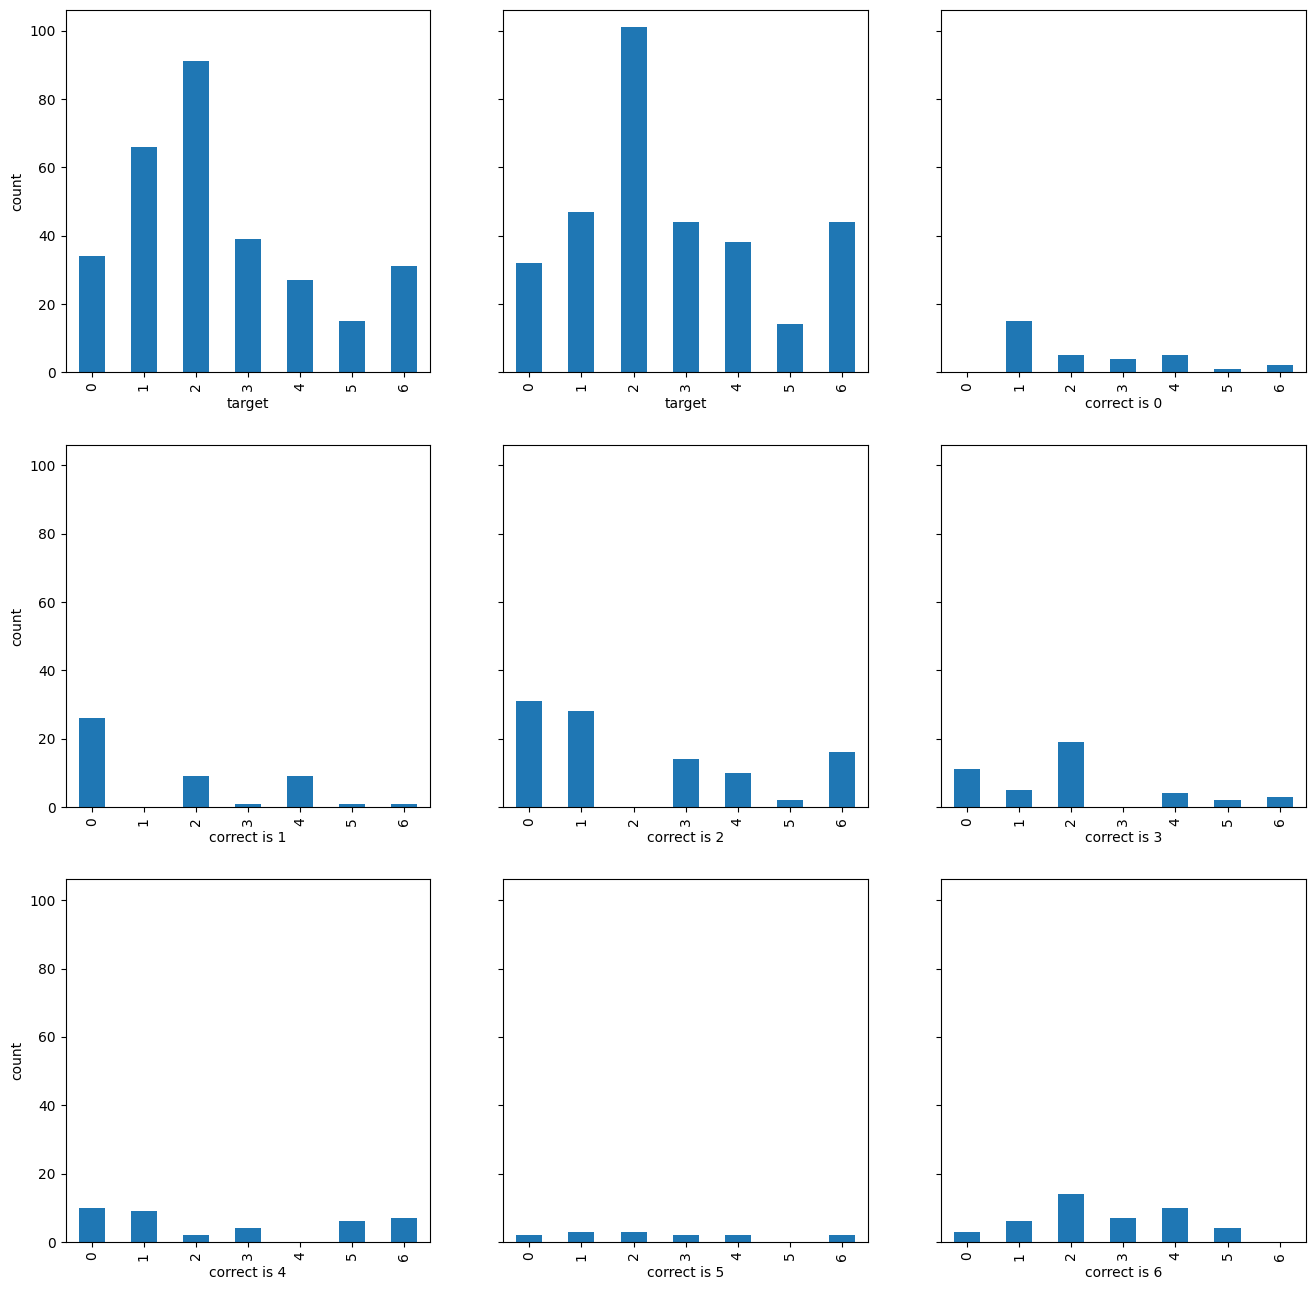

In [87]:
valid = pd.read_csv('../dev/dev_repunc_123.csv')

fig, axes =plt.subplots(3,3,figsize=(16,16),sharey='all')
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

(target
 0     28
 1     45
 2    112
 3     37
 4     27
 5     15
 6     29
 Name: count, dtype: int64,
 target
 0     51
 1     88
 2    116
 3     51
 4     37
 5     23
 6     56
 Name: count, dtype: int64)

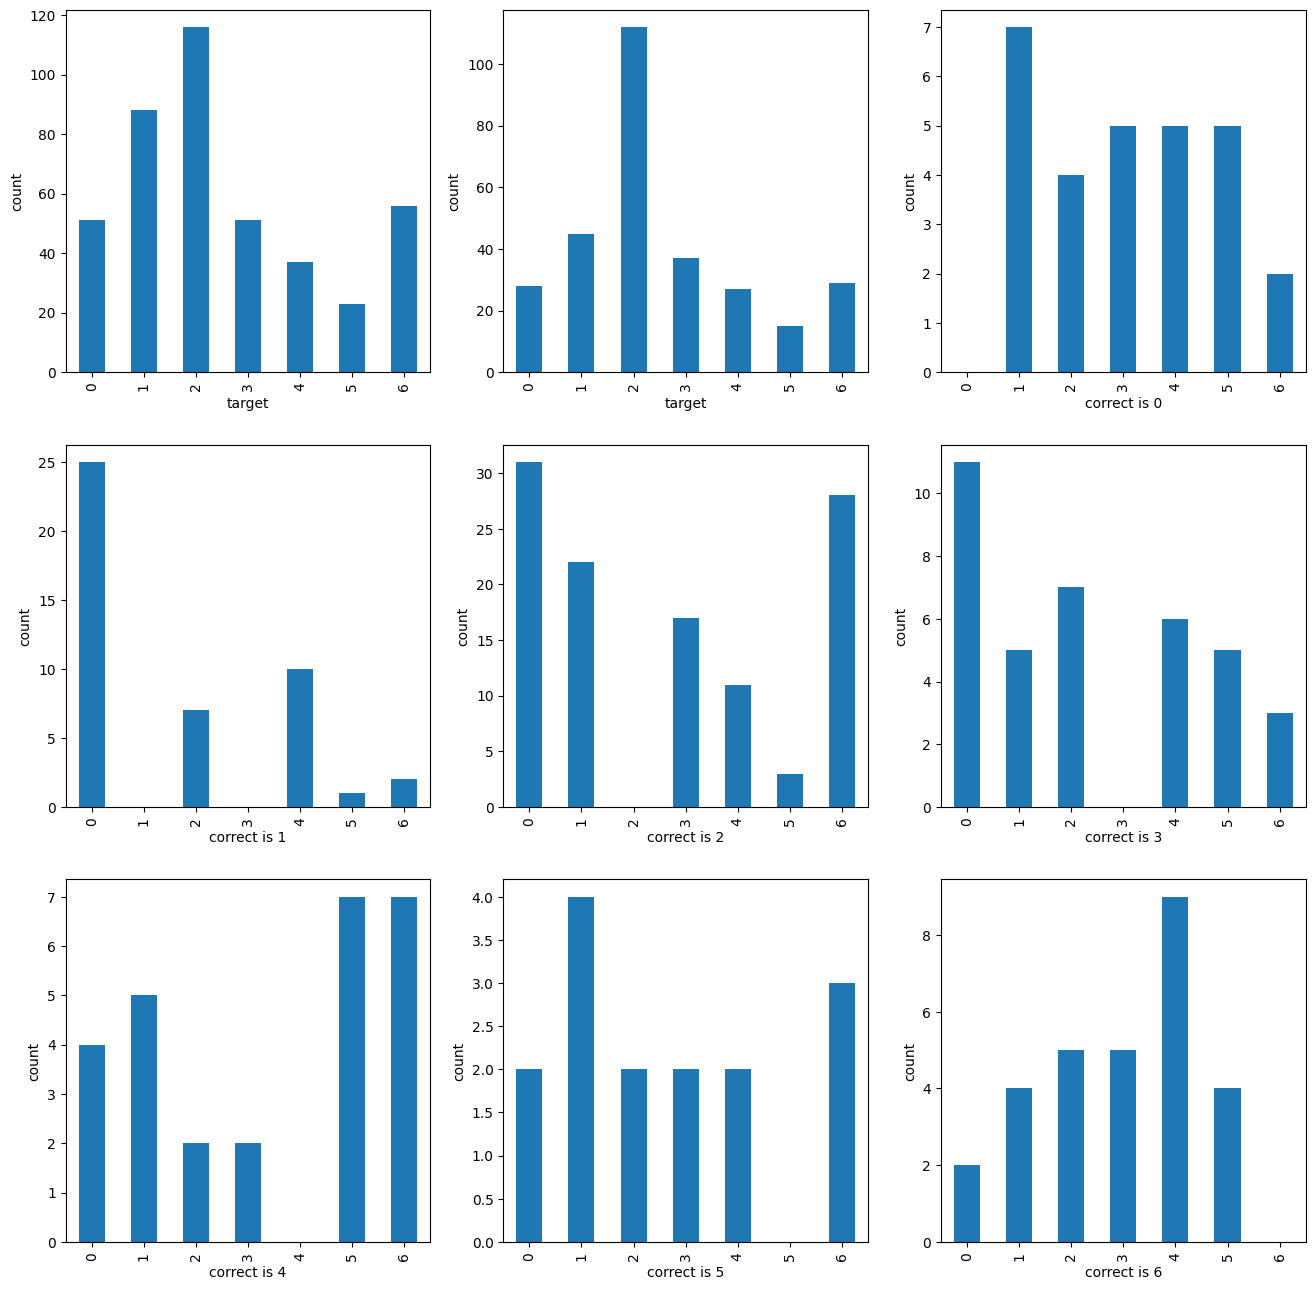

In [5]:
valid = pd.read_csv('../dev/dev_ai_total_3hal.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

In [14]:
f1.compute(predictions= valid_origin.pred_target, references=valid_origin.target, average='macro')


{'f1': 0.8543281536060173}

In [15]:
f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

{'f1': 0.857751251114977}

(target
 0     28
 1     45
 2    112
 3     37
 4     27
 5     15
 6     29
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.857751251114977})

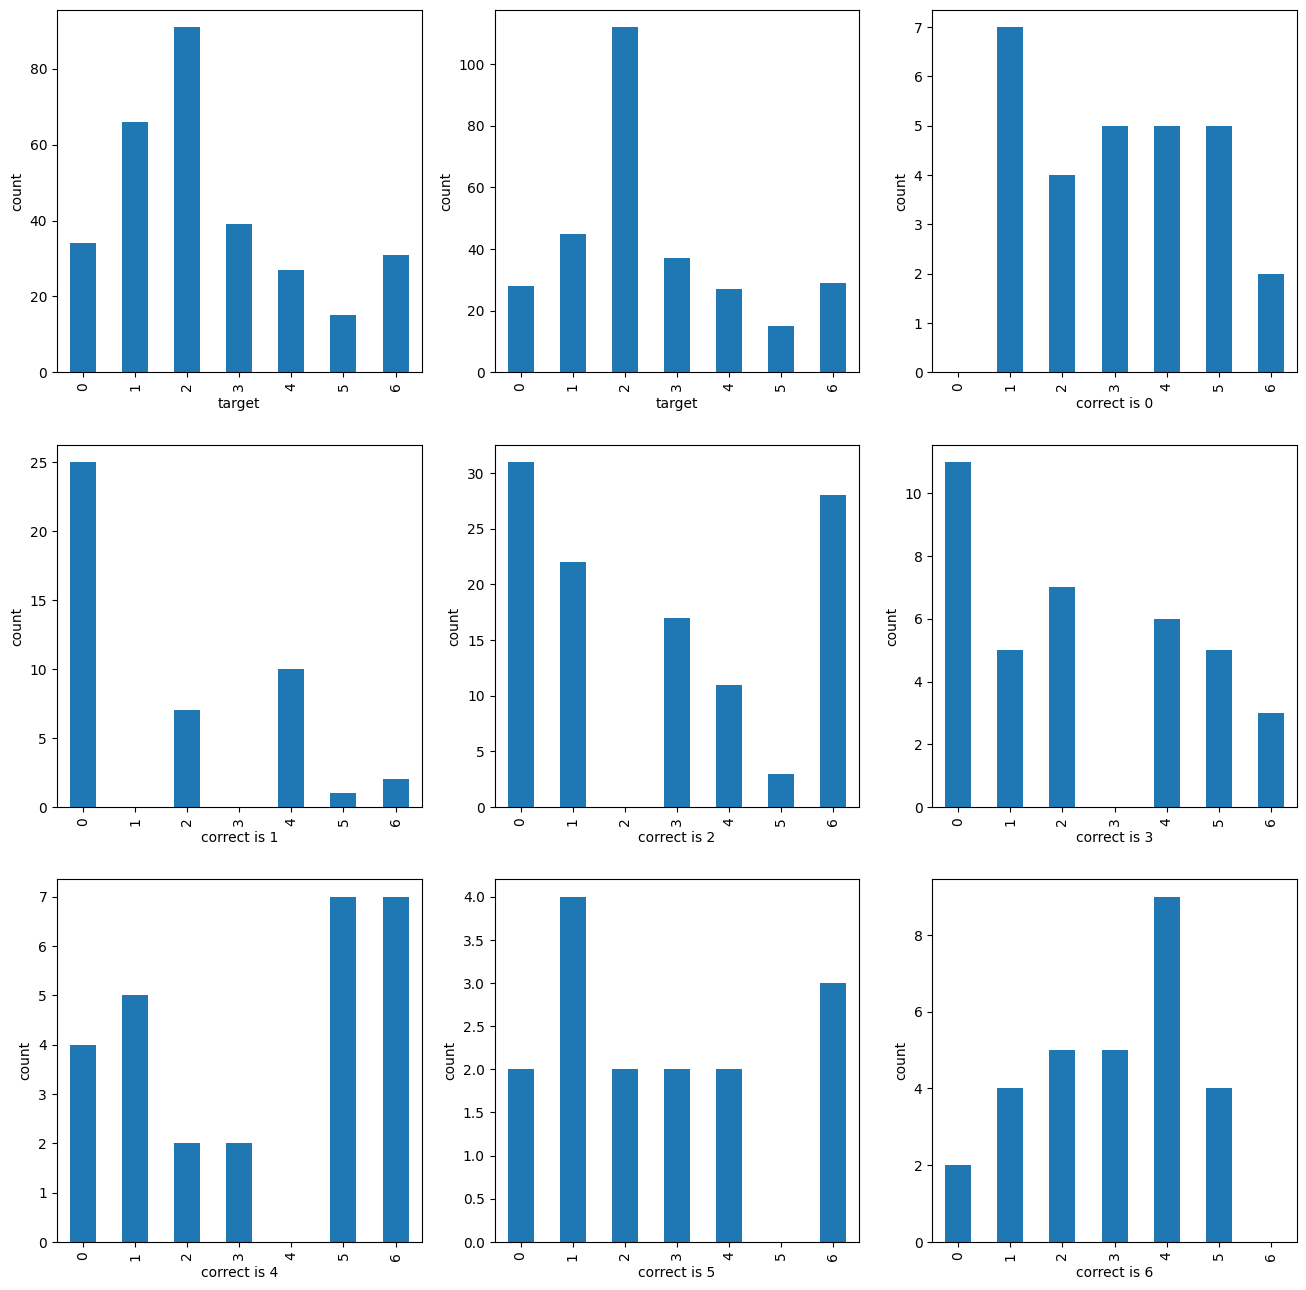

In [7]:
valid = pd.read_csv('../dev/dev_ai_total_3hal_origin.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0     22
 1     44
 2    107
 3     37
 4     25
 5     12
 6     25
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.867810114316829})

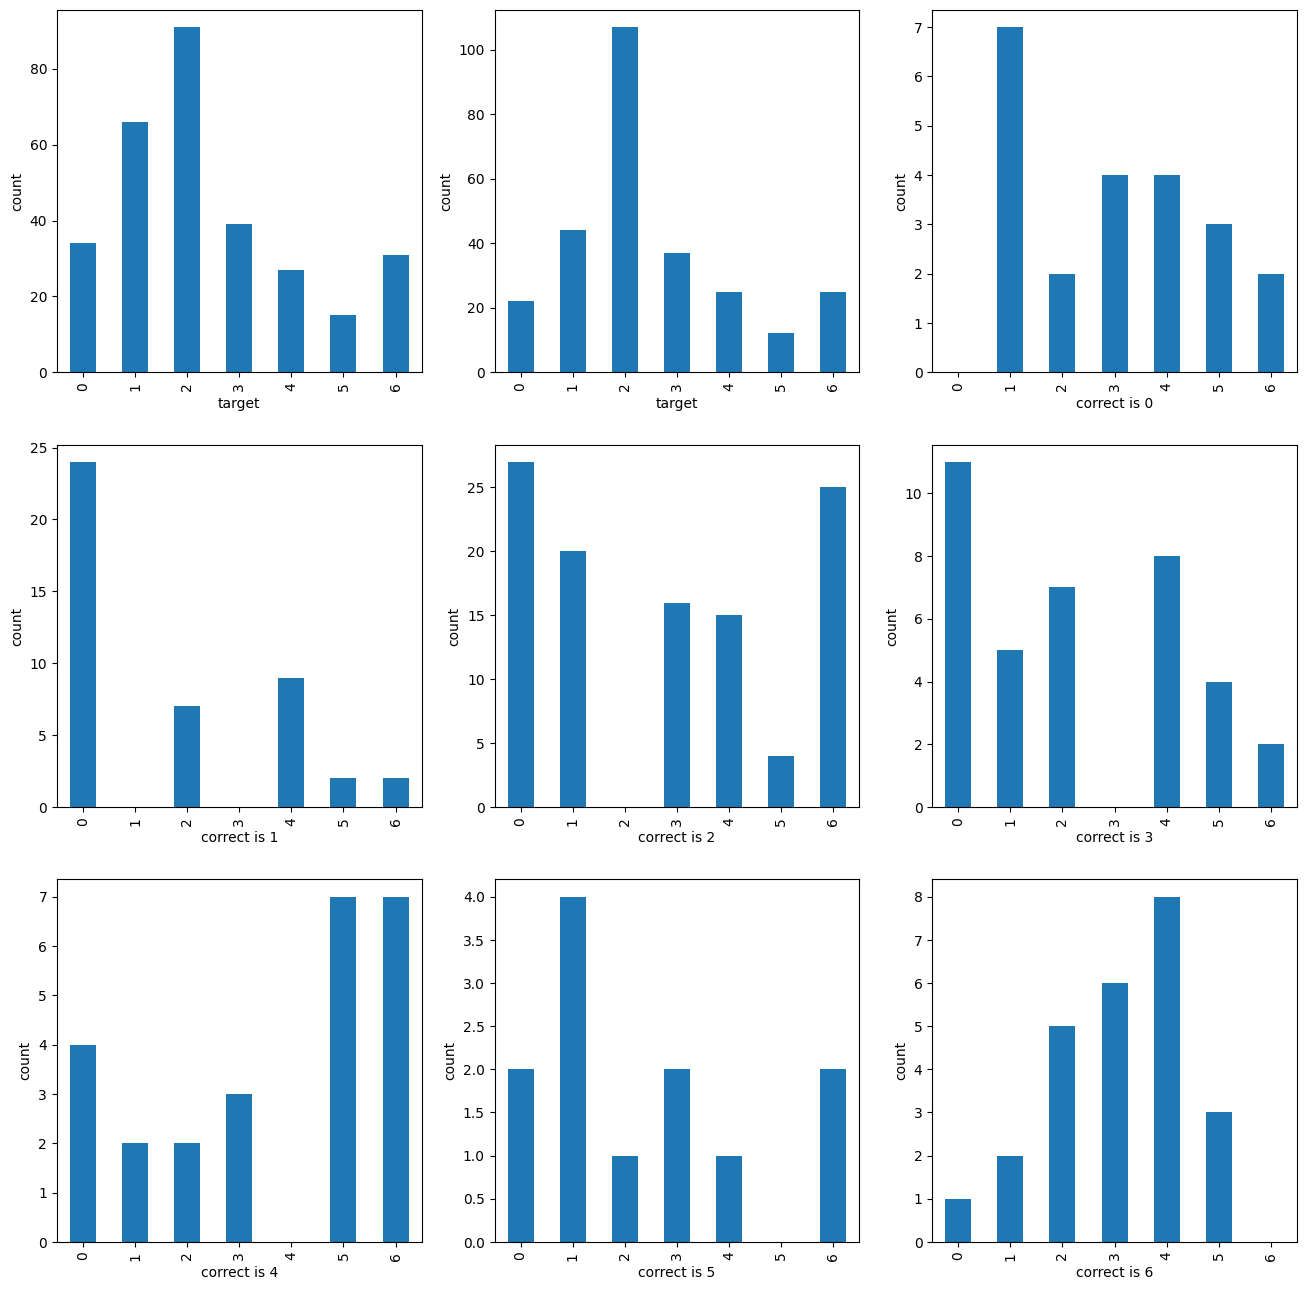

In [6]:
valid = pd.read_csv('../dev/dev_AIhub.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0     37
 1     64
 2    110
 3     27
 4     34
 5     12
 6     32
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.8469154738656938})

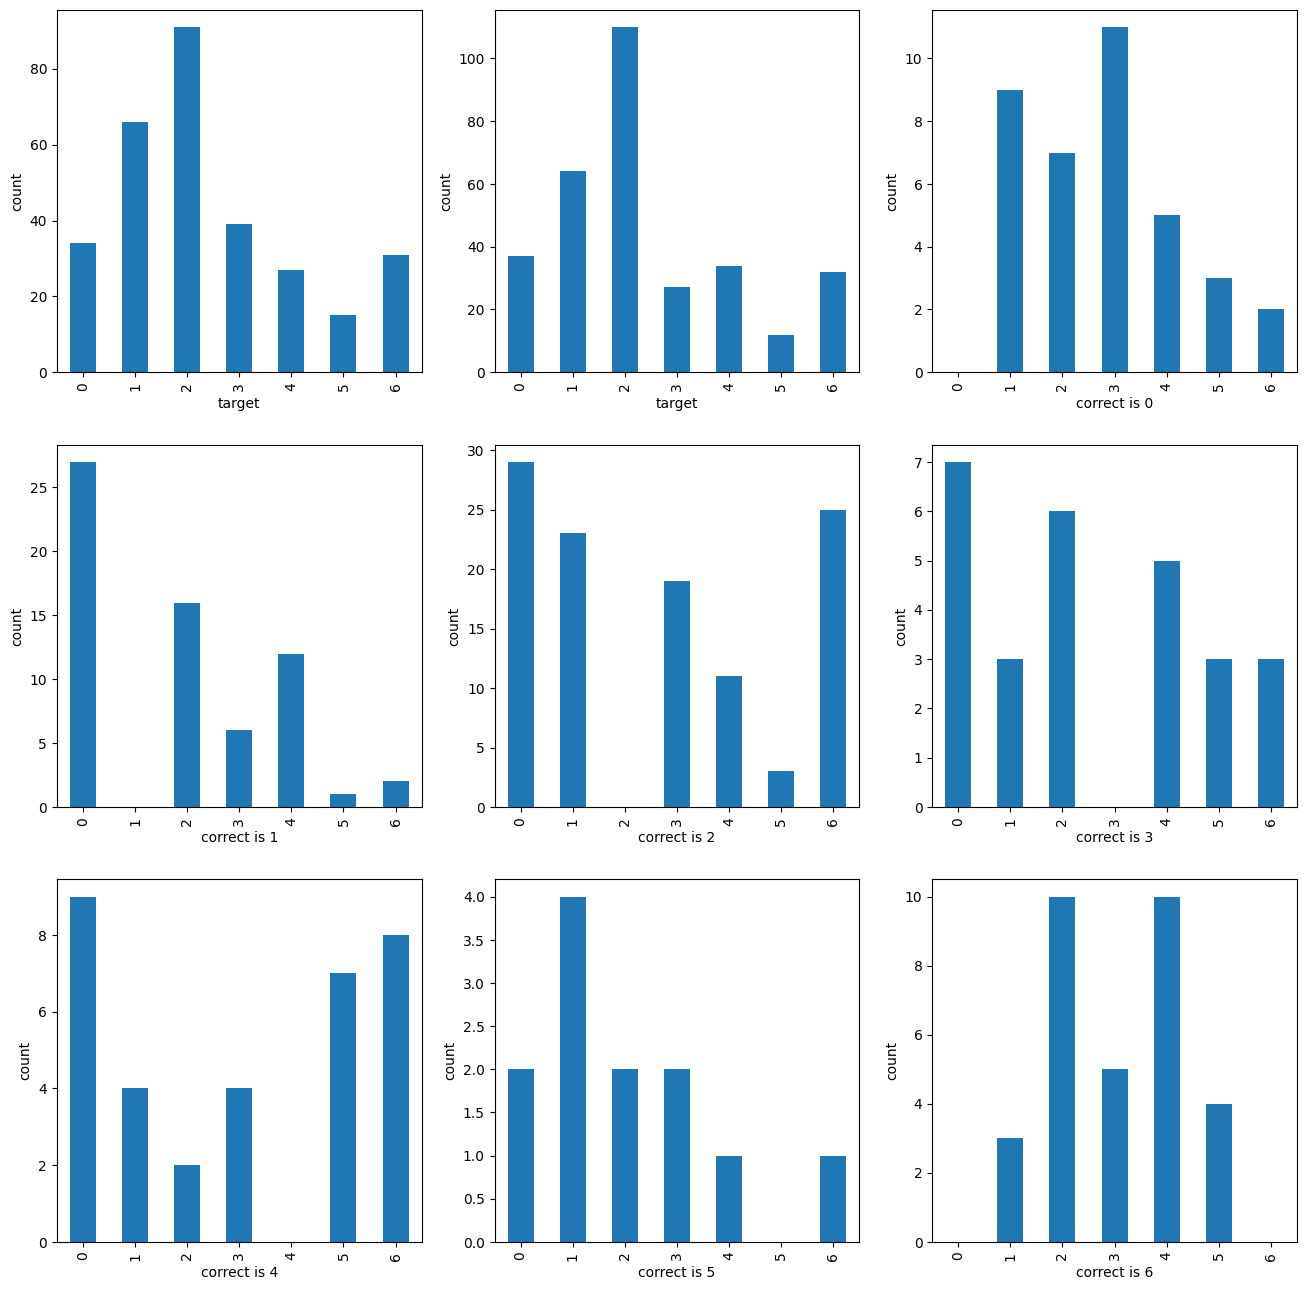

In [8]:
valid = pd.read_csv('../dev/dev_drop2_5.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0     39
 1     52
 2    132
 3     26
 4     27
 5     14
 6     30
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.8428647234030571})

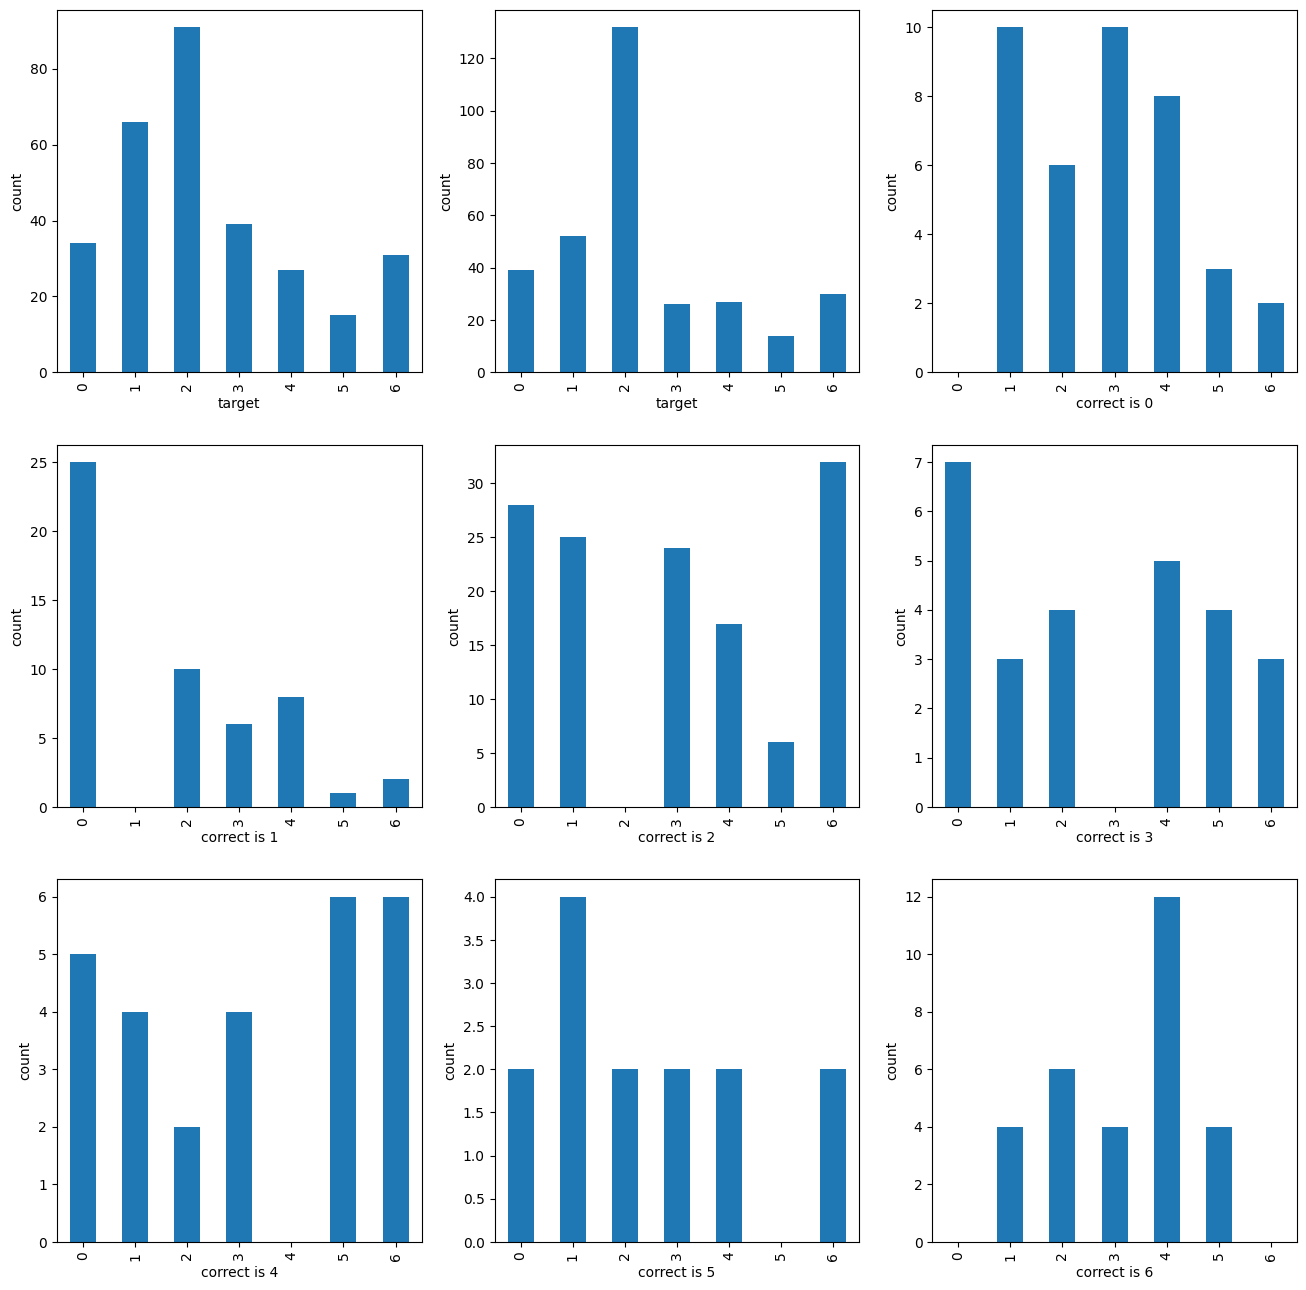

In [9]:
valid = pd.read_csv('../dev/dev_drop2_7.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0     33
 1     66
 2    104
 3     35
 4     28
 5     14
 6     29
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.8506701011028037})

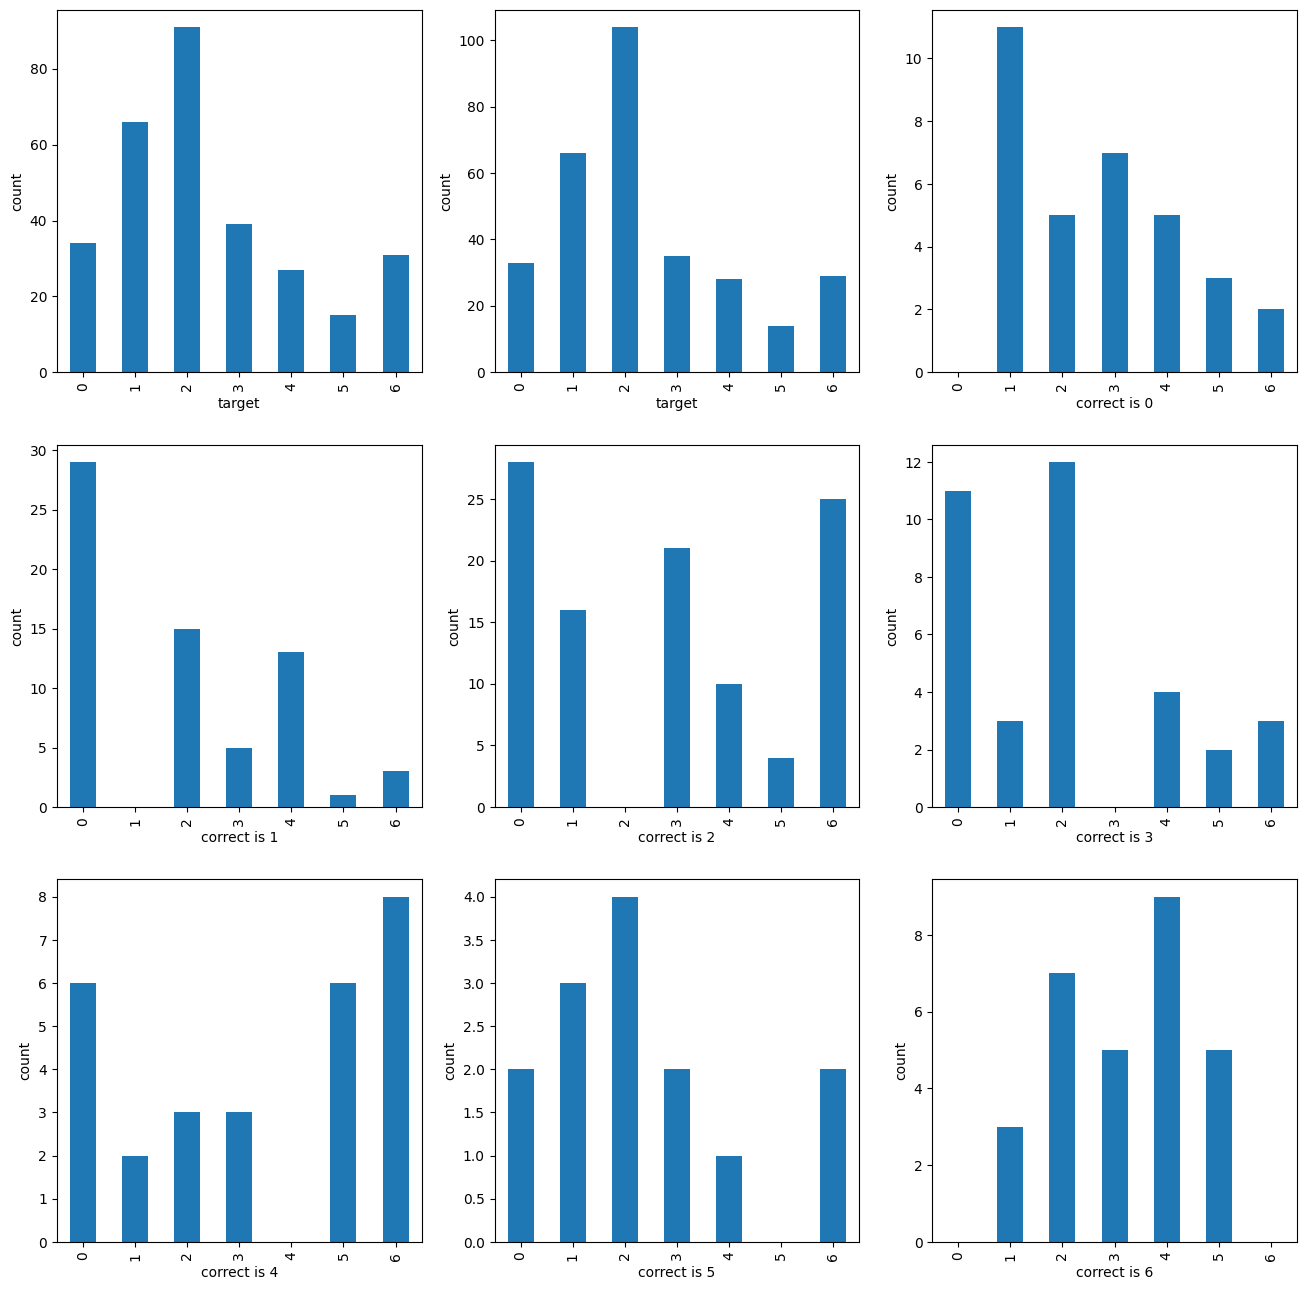

In [11]:
valid = pd.read_csv('../dev/dev_drop2_3.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

In [14]:
# print(valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)))
for i in [3,5,7]:
    valid = pd.read_csv(f'../dev/dev_drop2_{i}.csv')
    print(valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)))


target
0     33
1     66
2    104
3     35
4     28
5     14
6     29
Name: count, dtype: int64
target
0     37
1     64
2    110
3     27
4     34
5     12
6     32
Name: count, dtype: int64
target
0     39
1     52
2    132
3     26
4     27
5     14
6     30
Name: count, dtype: int64


In [15]:
valid = pd.read_csv(f'../dev/dev_dropRest.csv')
print(valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)))

target
0    44
1    64
2    78
3    58
4    32
5    16
6    35
Name: count, dtype: int64


(target
 0    44
 1    64
 2    78
 3    58
 4    32
 5    16
 6    35
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.844669053862951})

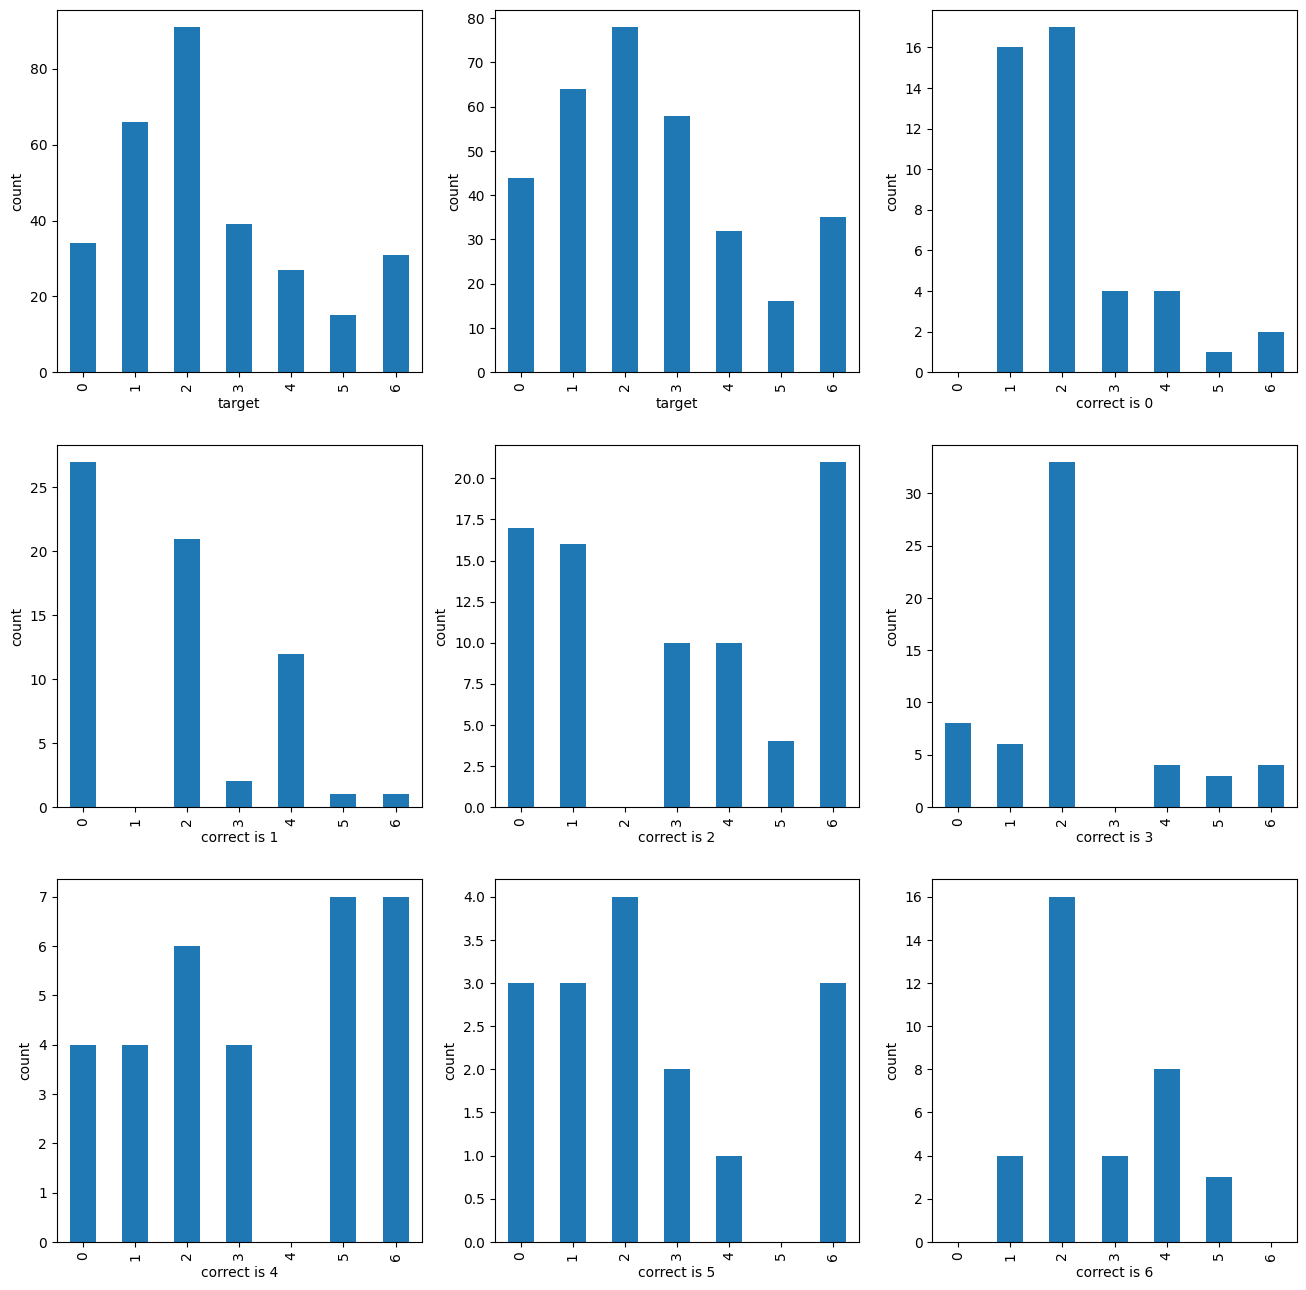

In [18]:
valid = pd.read_csv(f'../dev/dev_dropRest_3.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0    47
 1    71
 2    64
 3    57
 4    34
 5    19
 6    44
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.8413246052509488})

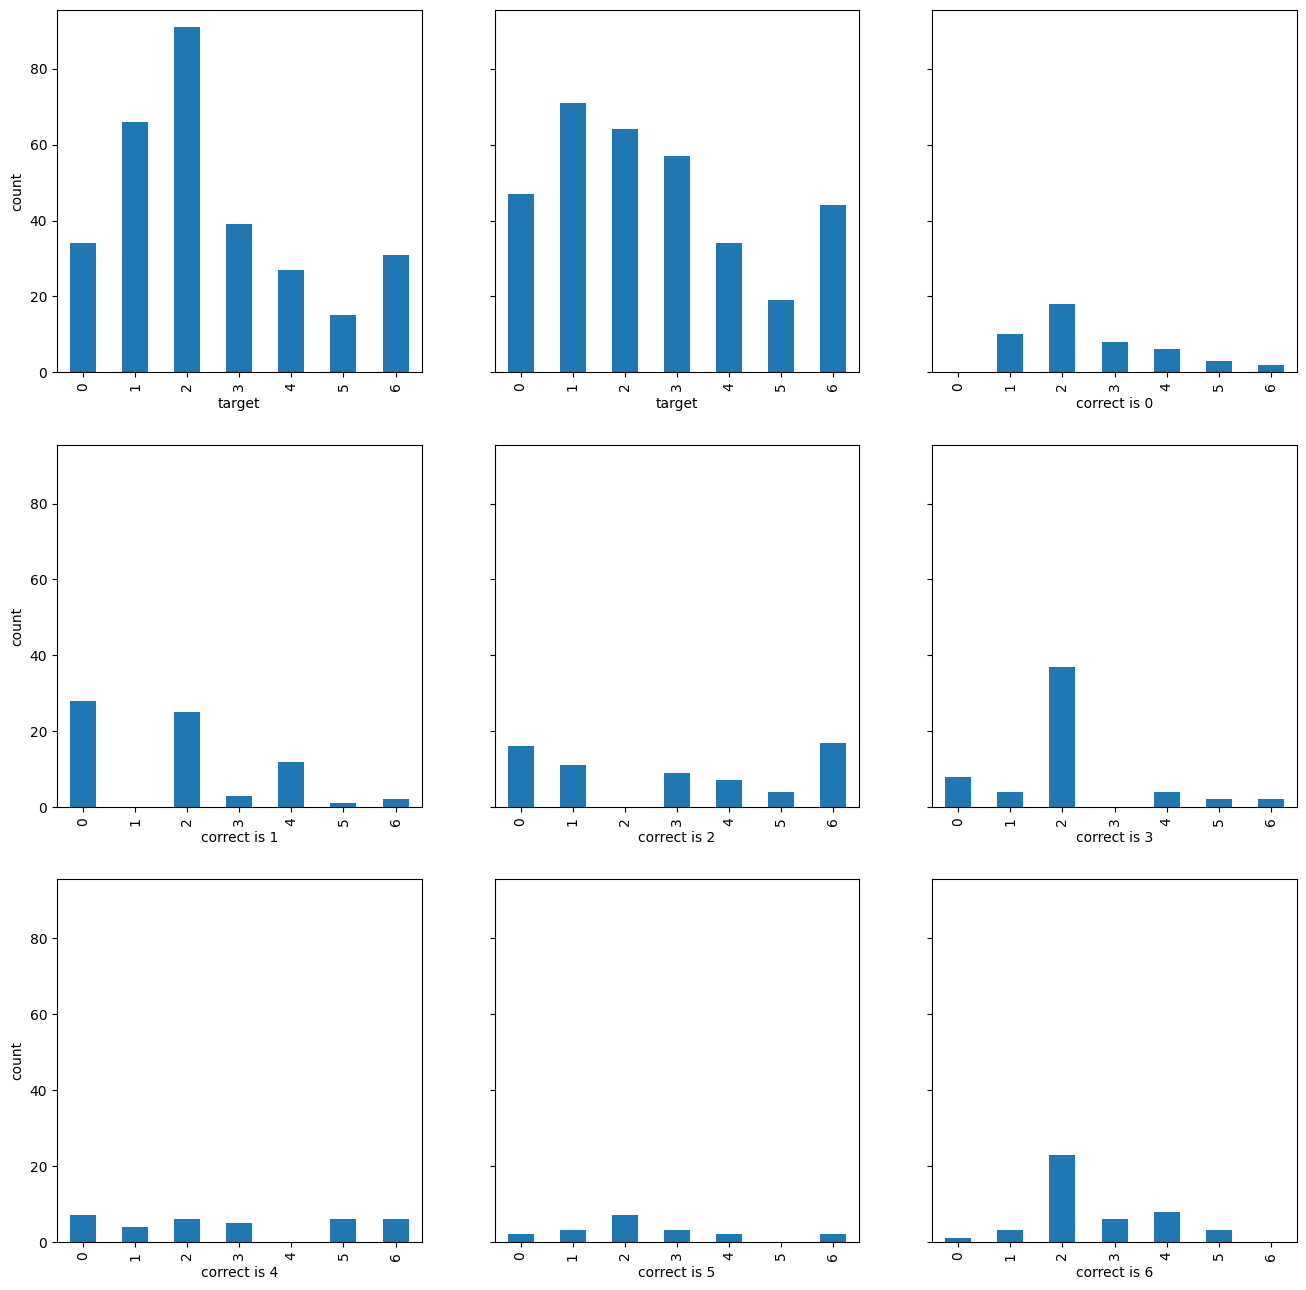

In [23]:
valid = pd.read_csv(f'../dev/dev_dropRest_5.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16),sharey=True)
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0    45
 1    61
 2    87
 3    36
 4    35
 5    15
 6    36
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.8491657148561235})

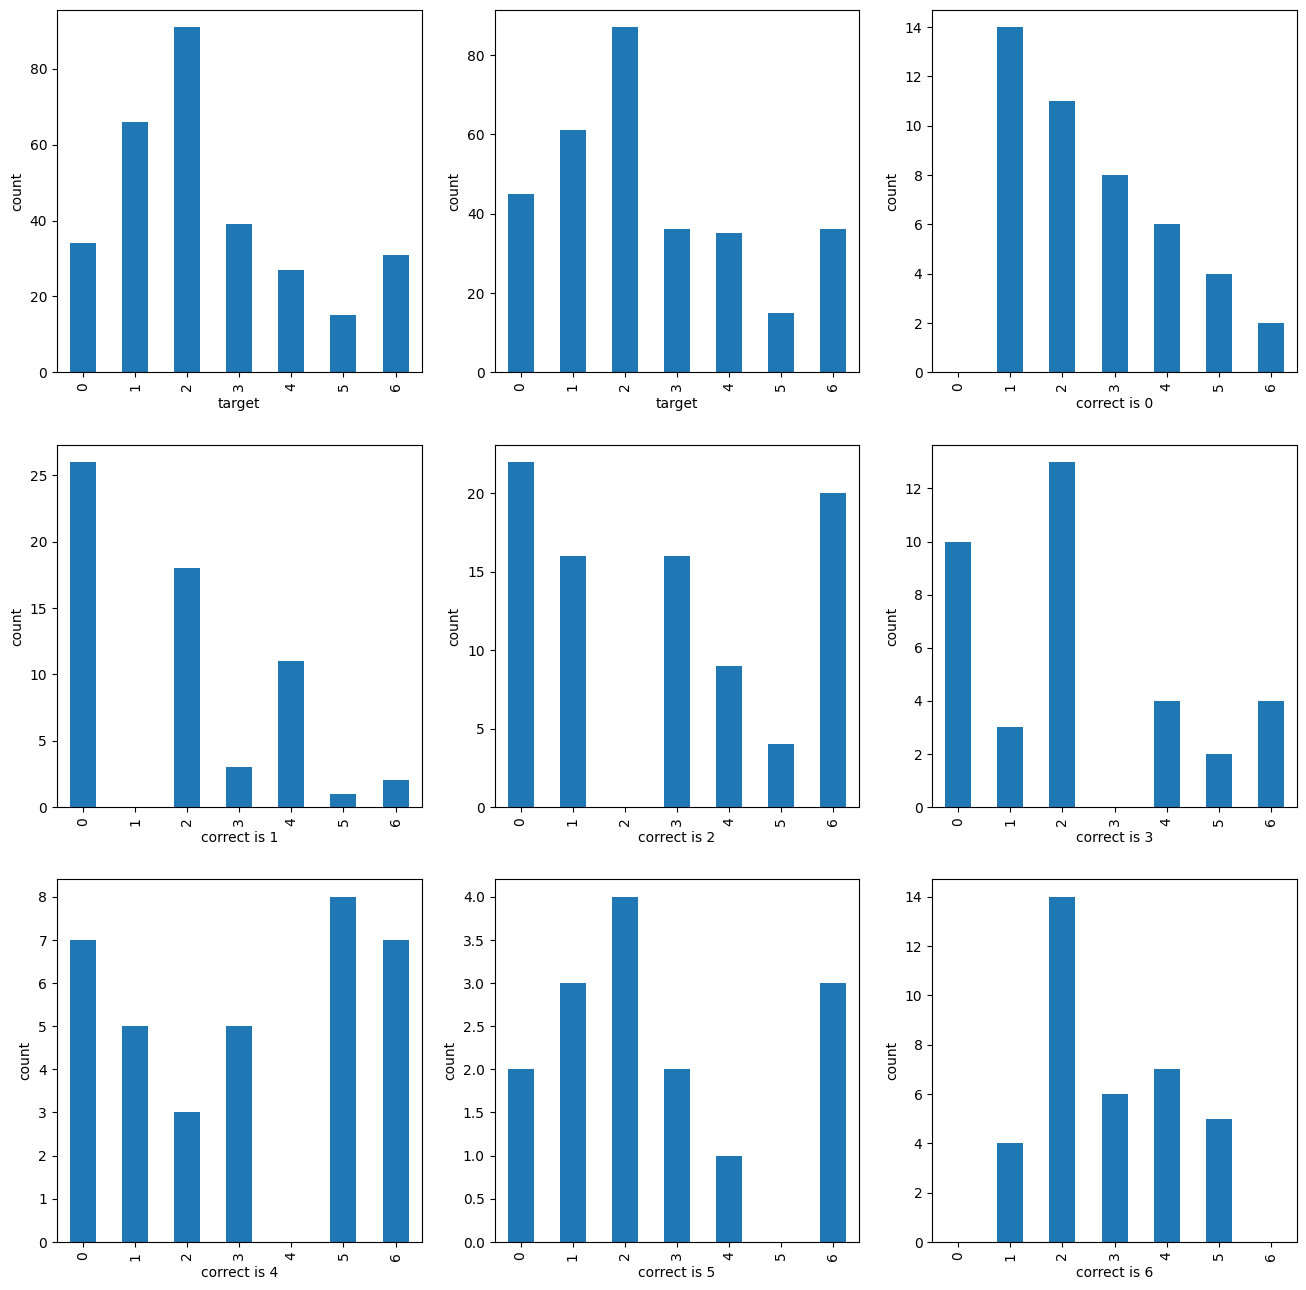

In [21]:
valid = pd.read_csv(f'../dev/dev_dropRest_2.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0    48
 1    76
 2    72
 3    49
 4    23
 5    14
 6    44
 Name: count, dtype: int64,
 target
 0    34
 1    66
 2    91
 3    39
 4    27
 5    15
 6    31
 Name: count, dtype: int64,
 {'f1': 0.8448736006329655})

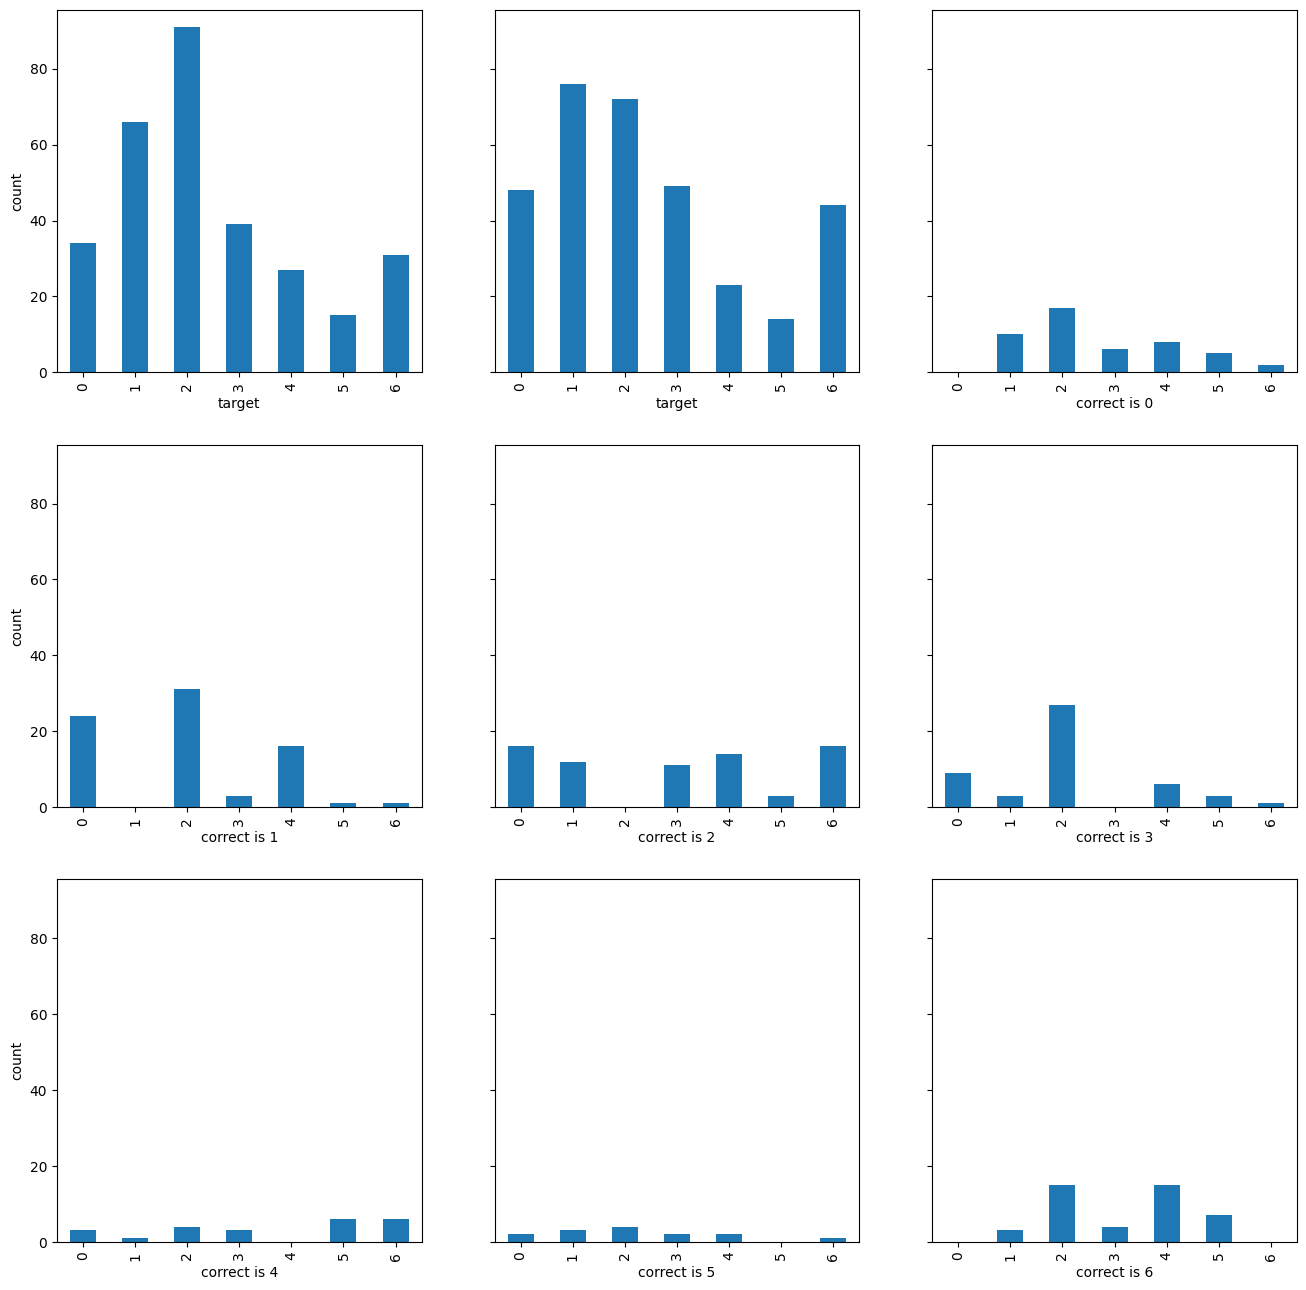

In [24]:
valid = pd.read_csv(f'../dev/dev_drop0136.csv')
fig, axes =plt.subplots(3,3,figsize=(16,16),sharey=True)
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)), f1.compute(predictions= valid.pred_target, references=valid.target, average='macro')

(target
 0    36
 1    62
 2    95
 3    39
 4    25
 5    12
 6    24
 Name: count, dtype: int64,
 target
 0    36
 1    62
 2    95
 3    39
 4    25
 5    12
 6    24
 Name: count, dtype: int64)

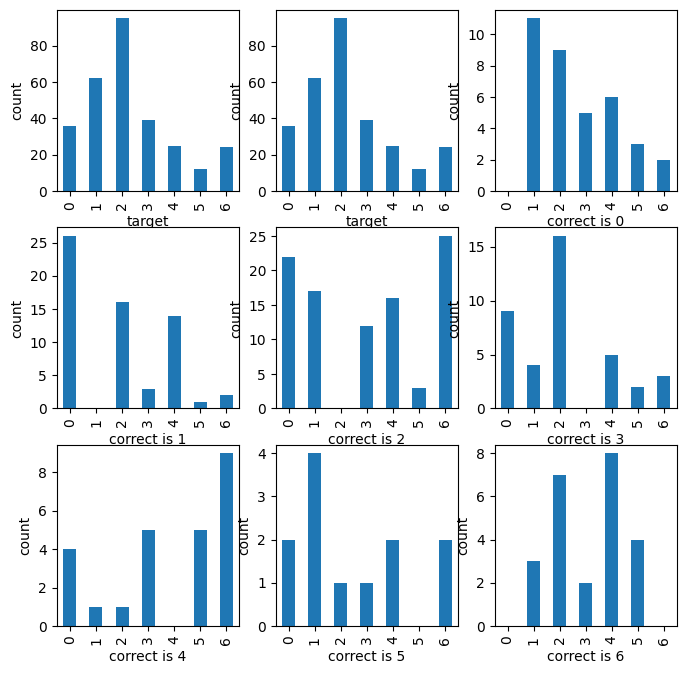

In [29]:
valid_origin = pd.read_csv(f'../dev/dev_p2g_base.csv')
valid = pd.read_csv(f'../dev/dev_p2g_base.csv')

fig, axes =plt.subplots(3,3,figsize=(8,8))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

(target
 0    50
 1    59
 2    80
 3    44
 4    25
 5    11
 6    43
 Name: count, dtype: int64,
 target
 0    36
 1    62
 2    95
 3    39
 4    25
 5    12
 6    24
 Name: count, dtype: int64)

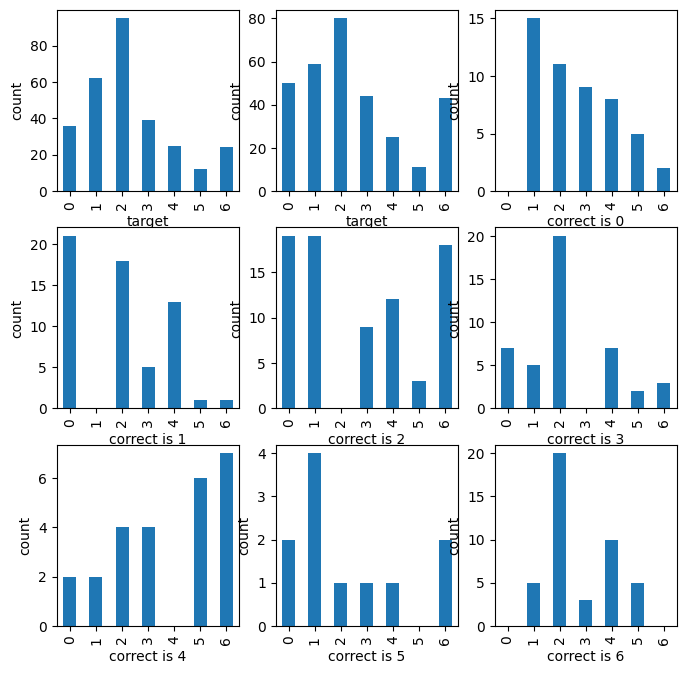

In [32]:
valid = pd.read_csv(f'../dev/dev_p2g_036.csv')
fig, axes =plt.subplots(3,3,figsize=(8,8))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

(target
 0    59
 1    59
 2    80
 3    30
 4    27
 5    11
 6    44
 Name: count, dtype: int64,
 target
 0    36
 1    62
 2    95
 3    39
 4    25
 5    12
 6    24
 Name: count, dtype: int64)

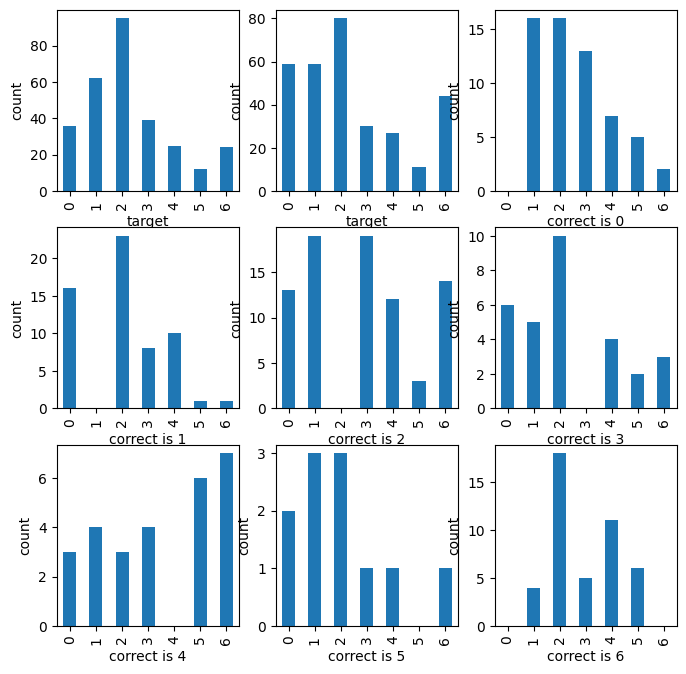

In [31]:
valid = pd.read_csv(f'../dev/dev_p2g_06.csv')
fig, axes =plt.subplots(3,3,figsize=(8,8))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))

(target
 0    51
 1    61
 2    77
 3    40
 4    27
 5    11
 6    38
 Name: count, dtype: int64,
 target
 0    36
 1    62
 2    95
 3    39
 4    25
 5    12
 6    24
 Name: count, dtype: int64)

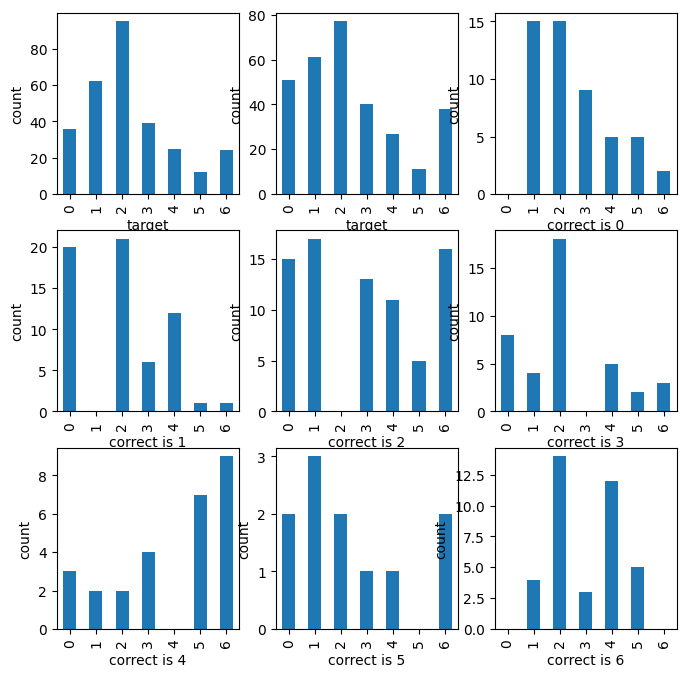

In [33]:
valid = pd.read_csv(f'../dev/dev_p2g_06_3.csv')
fig, axes =plt.subplots(3,3,figsize=(8,8))
axes =axes.flatten()
valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    valid[(valid.target != valid.pred_target) & (valid.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')
valid[valid.target != valid.pred_target].target.value_counts().reindex(range(7)),valid_origin[valid_origin.target != valid_origin.pred_target].target.value_counts().reindex(range(7))